# Intercomparison Campaigns - Interpolate Data

**Contains modified Copernicus Climate Change Service Information 2020**
under [License](https://apps.ecmwf.int/datasets/licences/copernicus/)

*Copernicus Climate Change Service (C3S) - Upper Air Data Service (2020)*

The purpose of this IPython Notebook is to demonstrate the usability of data from intercomparison campaigns.

    Author: U. Voggenberger
    Date: 09.2020
    Contact: ulrich.voggenberger [at] univie.ac.at
    License: C3S, 2020

In [1]:
import pandas
import numpy as np
import datetime
import glob
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import cdsapi, zipfile, os, time

# Please note: Server URL will be omitted, once published
c = cdsapi.Client(url='https://sis-dev.climate.copernicus.eu/api/v2')
from scipy.interpolate import interp1d
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams['figure.figsize'] = (10,10)
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

## Accessing data :

We will interpolate pressure data to compare different sondes, which were all mounted onto the same balloon. <br>
It's not necessary to select the data with the help of 'ListProfiles.xls' - a file for mapping the data of the different sondes to one ascent. <br>
Opening all available data and searching for the matching report_id would be possible too, we want to show you that it's not necessary to load all the data before computing. <br> <br>


__Consider that there is no height information matching the pressure values on early radiosondes.__ <br> <br>


We will select a reference sonde, based on the longest series of measurements.<br>
The pressure data of our reference sonde will be interpolated onto the time - minutes since the ascent start.<br>
With the resulting interpolation funktion we can get the exact moment, when the sonde were on a standard pressure level.<br>
In the second step we will get the pressure value of all the other sondes to that given time. For this process it's necessary to interpolate backwards: time onto pressure.<br>


2020-09-25 11:07:35,990 INFO Welcome to the CDS
2020-09-25 11:07:35,990 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


1956-5-27T9.0:30.0


2020-09-25 11:07:36,089 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601018927.2900534-21732-20-3667fe20-aa0a-491f-bdbe-15c9b9d9e969.zip to download.zip (20.1K)
2020-09-25 11:07:36,144 INFO Download rate 364.9K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00401-000


2020-09-25 11:07:36,188 INFO Welcome to the CDS
2020-09-25 11:07:36,189 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:36,484 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020840.003527-30917-15-924725bb-3dbd-48d7-affb-fa8a3d8a502d.zip to download.zip (23.4K)
2020-09-25 11:07:36,567 INFO Download rate 282.8K/s
2020-09-25 11:07:36,613 INFO Welcome to the CDS
2020-09-25 11:07:36,614 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00402-000


2020-09-25 11:07:36,778 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020840.7547615-31040-14-0653a22e-7921-46a0-8979-422f58f9d175.zip to download.zip (19.3K)
2020-09-25 11:07:36,834 INFO Download rate 347.4K/s
2020-09-25 11:07:36,880 INFO Welcome to the CDS
2020-09-25 11:07:36,881 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:36,965 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020842.0594723-31192-14-fe166280-f6e1-4f68-b7bf-f6ee9dbc4d86.zip to download.zip (21.4K)
2020-09-25 11:07:37,022 INFO Download rate 383.8K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00403-000
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00404-000


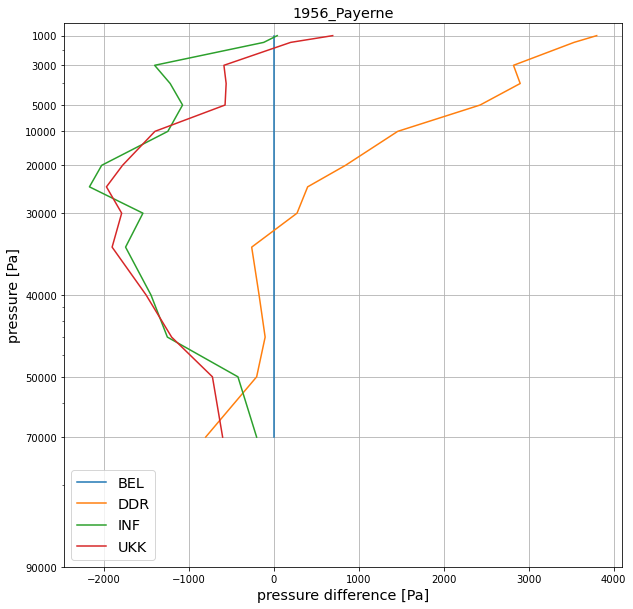

2020-09-25 11:07:37,505 INFO Welcome to the CDS
2020-09-25 11:07:37,506 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:37,581 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020843.4163709-31205-14-404f7199-7f8b-44ee-bc7c-2f202db86e9c.zip to download.zip (15.7K)
2020-09-25 11:07:37,638 INFO Download rate 282.9K/s


1956-5-27T15.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00405-001


2020-09-25 11:07:37,683 INFO Welcome to the CDS
2020-09-25 11:07:37,683 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:37,812 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
2020-09-25 11:07:37,869 INFO Download rate 442.3K/s
2020-09-25 11:07:37,915 INFO Welcome to the CDS
2020-09-25 11:07:37,916 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00406-001


2020-09-25 11:07:38,074 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020840.7547615-31040-14-0653a22e-7921-46a0-8979-422f58f9d175.zip to download.zip (19.3K)
2020-09-25 11:07:38,130 INFO Download rate 346K/s
2020-09-25 11:07:38,174 INFO Welcome to the CDS
2020-09-25 11:07:38,174 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:38,259 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020847.8928142-22173-14-b69e518f-4365-47e3-8c87-116736fbba7b.zip to download.zip (21.4K)
2020-09-25 11:07:38,315 INFO Download rate 387K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00403-001
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00407-001


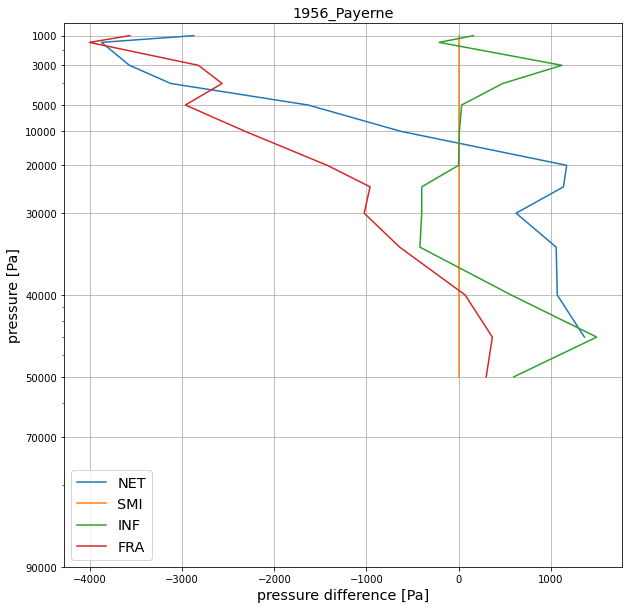

2020-09-25 11:07:38,759 INFO Welcome to the CDS
2020-09-25 11:07:38,759 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:38,832 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601018927.2900534-21732-20-3667fe20-aa0a-491f-bdbe-15c9b9d9e969.zip to download.zip (20.1K)
2020-09-25 11:07:38,887 INFO Download rate 367.1K/s
2020-09-25 11:07:38,931 INFO Welcome to the CDS
2020-09-25 11:07:38,931 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


1956-5-28T9.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00401-002


2020-09-25 11:07:39,029 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)
2020-09-25 11:07:39,086 INFO Download rate 532.1K/s
2020-09-25 11:07:39,136 INFO Welcome to the CDS
2020-09-25 11:07:39,137 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:39,225 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020907.4195106-3448-12-bb0a3108-9e6d-456e-a559-9fee9b012ad8.zip to download.zip (25.5K)
2020-09-25 11:07:39,281 INFO Download rate 459.3K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00408-002
Unzipping retrieved files: to ./exampla_data/5/2


2020-09-25 11:07:39,329 INFO Welcome to the CDS
2020-09-25 11:07:39,329 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:39,466 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020843.4163709-31205-14-404f7199-7f8b-44ee-bc7c-2f202db86e9c.zip to download.zip (15.7K)
  0%|          | 0.00/15.7k [00:00<?, ?B/s]

0-20100-0-00409-002


2020-09-25 11:07:39,498 INFO Download rate 510.4K/s
2020-09-25 11:07:39,543 INFO Welcome to the CDS
2020-09-25 11:07:39,543 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:39,667 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)
  0%|          | 0.00/29.8k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00405-002
1956-5-28T15.0:0.0


2020-09-25 11:07:39,725 INFO Download rate 519.5K/s
2020-09-25 11:07:39,769 INFO Welcome to the CDS
2020-09-25 11:07:39,770 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:39,866 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020840.003527-30917-15-924725bb-3dbd-48d7-affb-fa8a3d8a502d.zip to download.zip (23.4K)
2020-09-25 11:07:39,922 INFO Download rate 424.9K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00408-003
Unzipping retrieved files: to ./exampla_data/5/1


2020-09-25 11:07:39,966 INFO Welcome to the CDS
2020-09-25 11:07:39,966 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:40,054 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020909.3603854-25431-12-0fccb7b8-171d-4678-aca0-5f8915380c51.zip to download.zip (22.2K)
2020-09-25 11:07:40,110 INFO Download rate 401.3K/s


0-20100-0-00402-003
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00410-003


2020-09-25 11:07:40,158 INFO Welcome to the CDS
2020-09-25 11:07:40,159 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:40,269 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
2020-09-25 11:07:40,326 INFO Download rate 440.5K/s
2020-09-25 11:07:40,377 INFO Welcome to the CDS
2020-09-25 11:07:40,378 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:40,463 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020910.9522562-7075-11-fe68e5e9-3b30-4ad0-aef3-142e46e3ddfd.zip to download.zip (17.2K)
2020-09-25 11:07:40,495 INFO Download rate 557.8K/s


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00406-003
1956-5-28T22.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00411-004


2020-09-25 11:07:40,540 INFO Welcome to the CDS
2020-09-25 11:07:40,540 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:40,650 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020842.0594723-31192-14-fe166280-f6e1-4f68-b7bf-f6ee9dbc4d86.zip to download.zip (21.4K)
2020-09-25 11:07:40,707 INFO Download rate 378.8K/s
2020-09-25 11:07:40,753 INFO Welcome to the CDS
2020-09-25 11:07:40,753 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00404-004


2020-09-25 11:07:41,004 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020840.7547615-31040-14-0653a22e-7921-46a0-8979-422f58f9d175.zip to download.zip (19.3K)
2020-09-25 11:07:41,060 INFO Download rate 346.6K/s
2020-09-25 11:07:41,105 INFO Welcome to the CDS
2020-09-25 11:07:41,105 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:41,189 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020847.8928142-22173-14-b69e518f-4365-47e3-8c87-116736fbba7b.zip to download.zip (21.4K)
2020-09-25 11:07:41,244 INFO Download rate 390.4K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00403-004
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00407-004
1956-5-29T0.0:30.0


2020-09-25 11:07:41,298 INFO Welcome to the CDS
2020-09-25 11:07:41,299 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:41,386 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020842.0594723-31192-14-fe166280-f6e1-4f68-b7bf-f6ee9dbc4d86.zip to download.zip (21.4K)
2020-09-25 11:07:41,442 INFO Download rate 384K/s
2020-09-25 11:07:41,488 INFO Welcome to the CDS
2020-09-25 11:07:41,489 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:41,574 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020843.4163709-31205-14-404f7199-7f8b-44ee-bc7c-2f202db86e9c.zip to download.zip (15.7K)
2020-09-25 11:07:41,605 INFO Download rate 503.2K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00404-005
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00405-005


2020-09-25 11:07:41,645 INFO Welcome to the CDS
2020-09-25 11:07:41,645 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:41,745 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601018927.2900534-21732-20-3667fe20-aa0a-491f-bdbe-15c9b9d9e969.zip to download.zip (20.1K)
2020-09-25 11:07:41,800 INFO Download rate 364.8K/s
2020-09-25 11:07:41,846 INFO Welcome to the CDS
2020-09-25 11:07:41,847 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00401-005


2020-09-25 11:07:42,103 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020914.1597245-7077-12-da435ccf-416f-41cb-9763-19c40bb22c91.zip to download.zip (22.4K)
2020-09-25 11:07:42,159 INFO Download rate 400.4K/s
2020-09-25 11:07:42,203 INFO Welcome to the CDS
2020-09-25 11:07:42,203 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:42,302 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020840.003527-30917-15-924725bb-3dbd-48d7-affb-fa8a3d8a502d.zip to download.zip (23.4K)
2020-09-25 11:07:42,358 INFO Download rate 421K/s


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00412-005
1956-5-29T9.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0


2020-09-25 11:07:42,408 INFO Welcome to the CDS
2020-09-25 11:07:42,408 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:42,493 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020907.4195106-3448-12-bb0a3108-9e6d-456e-a559-9fee9b012ad8.zip to download.zip (25.5K)
2020-09-25 11:07:42,550 INFO Download rate 451.2K/s


0-20100-0-00402-006
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00409-006


2020-09-25 11:07:42,595 INFO Welcome to the CDS
2020-09-25 11:07:42,595 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:42,695 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020847.8928142-22173-14-b69e518f-4365-47e3-8c87-116736fbba7b.zip to download.zip (21.4K)
2020-09-25 11:07:42,750 INFO Download rate 391.8K/s
2020-09-25 11:07:42,798 INFO Welcome to the CDS
2020-09-25 11:07:42,798 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00407-006


2020-09-25 11:07:42,955 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020916.0346596-26255-12-bf94a372-d220-4cb1-8bd3-fd8b445576c4.zip to download.zip (22.6K)
2020-09-25 11:07:43,010 INFO Download rate 415.3K/s
2020-09-25 11:07:43,059 INFO Welcome to the CDS
2020-09-25 11:07:43,060 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:43,154 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020907.4195106-3448-12-bb0a3108-9e6d-456e-a559-9fee9b012ad8.zip to download.zip (25.5K)
2020-09-25 11:07:43,210 INFO Download rate 459.3K/s


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00413-006
1956-5-29T15.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0

2020-09-25 11:07:43,254 INFO Welcome to the CDS
2020-09-25 11:07:43,255 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:43,358 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020909.3603854-25431-12-0fccb7b8-171d-4678-aca0-5f8915380c51.zip to download.zip (22.2K)
  0%|          | 0.00/22.2k [00:00<?, ?B/s]


0-20100-0-00409-007


2020-09-25 11:07:43,414 INFO Download rate 406.6K/s
2020-09-25 11:07:43,460 INFO Welcome to the CDS
2020-09-25 11:07:43,461 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:43,574 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020914.1597245-7077-12-da435ccf-416f-41cb-9763-19c40bb22c91.zip to download.zip (22.4K)
  0%|          | 0.00/22.4k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00410-007


2020-09-25 11:07:43,630 INFO Download rate 401.1K/s
2020-09-25 11:07:43,675 INFO Welcome to the CDS
2020-09-25 11:07:43,675 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:43,760 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020840.7547615-31040-14-0653a22e-7921-46a0-8979-422f58f9d175.zip to download.zip (19.3K)
2020-09-25 11:07:43,791 INFO Download rate 631.8K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00412-007
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00403-007
1956-5-29T22.0:0.0


2020-09-25 11:07:43,837 INFO Welcome to the CDS
2020-09-25 11:07:43,838 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:44,850 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020843.4163709-31205-14-404f7199-7f8b-44ee-bc7c-2f202db86e9c.zip to download.zip (15.7K)
2020-09-25 11:07:44,906 INFO Download rate 282.9K/s
2020-09-25 11:07:44,951 INFO Welcome to the CDS
2020-09-25 11:07:44,952 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:45,045 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
2020-09-25 11:07:45,101 INFO Download rate 445.4K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00405-008
Unzipping retrieved files: to ./exampla_data/5/1


2020-09-25 11:07:45,144 INFO Welcome to the CDS
2020-09-25 11:07:45,145 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:45,240 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)
2020-09-25 11:07:45,297 INFO Download rate 523.9K/s


0-20100-0-00406-008
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00408-008


2020-09-25 11:07:45,344 INFO Welcome to the CDS
2020-09-25 11:07:45,344 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:45,432 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020910.9522562-7075-11-fe68e5e9-3b30-4ad0-aef3-142e46e3ddfd.zip to download.zip (17.2K)
2020-09-25 11:07:45,462 INFO Download rate 566.1K/s
2020-09-25 11:07:45,508 INFO Welcome to the CDS
2020-09-25 11:07:45,509 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:45,593 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
2020-09-25 11:07:45,650 INFO Download rate 437.1K/s


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00411-008
1956-5-30T0.0:30.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00406-009


2020-09-25 11:07:45,697 INFO Welcome to the CDS
2020-09-25 11:07:45,698 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:45,784 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020916.0346596-26255-12-bf94a372-d220-4cb1-8bd3-fd8b445576c4.zip to download.zip (22.6K)
2020-09-25 11:07:45,839 INFO Download rate 411.9K/s
2020-09-25 11:07:45,883 INFO Welcome to the CDS
2020-09-25 11:07:45,884 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:45,982 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020840.003527-30917-15-924725bb-3dbd-48d7-affb-fa8a3d8a502d.zip to download.zip (23.4K)
2020-09-25 11:07:46,039 INFO Download rate 414.8K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00413-009
Unzipping retrieved files: to ./exampla_data/5/2


2020-09-25 11:07:46,087 INFO Welcome to the CDS
2020-09-25 11:07:46,087 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:46,175 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020842.0594723-31192-14-fe166280-f6e1-4f68-b7bf-f6ee9dbc4d86.zip to download.zip (21.4K)
2020-09-25 11:07:46,231 INFO Download rate 385.3K/s


0-20100-0-00402-009
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00404-009
1956-5-30T9.0:0.0


2020-09-25 11:07:46,276 INFO Welcome to the CDS
2020-09-25 11:07:46,276 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:46,383 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020909.3603854-25431-12-0fccb7b8-171d-4678-aca0-5f8915380c51.zip to download.zip (22.2K)
2020-09-25 11:07:46,439 INFO Download rate 399.4K/s
2020-09-25 11:07:46,485 INFO Welcome to the CDS
2020-09-25 11:07:46,486 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:46,586 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020847.8928142-22173-14-b69e518f-4365-47e3-8c87-116736fbba7b.zip to download.zip (21.4K)
                                           

Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00410-010


2020-09-25 11:07:46,641 INFO Download rate 395K/s
2020-09-25 11:07:46,687 INFO Welcome to the CDS
2020-09-25 11:07:46,687 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:46,774 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020910.9522562-7075-11-fe68e5e9-3b30-4ad0-aef3-142e46e3ddfd.zip to download.zip (17.2K)
2020-09-25 11:07:46,832 INFO Download rate 300.4K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00407-010
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00411-010


2020-09-25 11:07:46,872 INFO Welcome to the CDS
2020-09-25 11:07:46,872 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:46,969 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601018927.2900534-21732-20-3667fe20-aa0a-491f-bdbe-15c9b9d9e969.zip to download.zip (20.1K)
2020-09-25 11:07:47,027 INFO Download rate 344.7K/s
2020-09-25 11:07:47,073 INFO Welcome to the CDS
2020-09-25 11:07:47,074 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:47,219 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020847.8928142-22173-14-b69e518f-4365-47e3-8c87-116736fbba7b.zip to download.zip (21.4K)


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00401-010
1956-5-30T15.0:0.0


2020-09-25 11:07:47,274 INFO Download rate 394.3K/s
2020-09-25 11:07:47,321 INFO Welcome to the CDS
2020-09-25 11:07:47,321 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:47,419 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020914.1597245-7077-12-da435ccf-416f-41cb-9763-19c40bb22c91.zip to download.zip (22.4K)
2020-09-25 11:07:47,475 INFO Download rate 402.8K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00407-011


2020-09-25 11:07:47,523 INFO Welcome to the CDS
2020-09-25 11:07:47,524 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00412-011


2020-09-25 11:07:47,686 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020842.0594723-31192-14-fe166280-f6e1-4f68-b7bf-f6ee9dbc4d86.zip to download.zip (21.4K)
2020-09-25 11:07:47,742 INFO Download rate 386.2K/s
2020-09-25 11:07:47,786 INFO Welcome to the CDS
2020-09-25 11:07:47,786 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:47,872 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)
2020-09-25 11:07:47,928 INFO Download rate 534.6K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00404-011
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00408-011
1956-5-30T22.0:0.0


2020-09-25 11:07:47,977 INFO Welcome to the CDS
2020-09-25 11:07:47,977 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:48,071 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020916.0346596-26255-12-bf94a372-d220-4cb1-8bd3-fd8b445576c4.zip to download.zip (22.6K)
2020-09-25 11:07:48,126 INFO Download rate 412.8K/s
2020-09-25 11:07:48,172 INFO Welcome to the CDS
2020-09-25 11:07:48,173 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:48,273 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020840.7547615-31040-14-0653a22e-7921-46a0-8979-422f58f9d175.zip to download.zip (19.3K)
  0%|          | 0.00/19.3k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00413-012


2020-09-25 11:07:48,329 INFO Download rate 348.3K/s
2020-09-25 11:07:48,377 INFO Welcome to the CDS
2020-09-25 11:07:48,377 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:48,495 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020907.4195106-3448-12-bb0a3108-9e6d-456e-a559-9fee9b012ad8.zip to download.zip (25.5K)
  0%|          | 0.00/25.5k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00403-012


2020-09-25 11:07:48,551 INFO Download rate 458.5K/s
2020-09-25 11:07:48,598 INFO Welcome to the CDS
2020-09-25 11:07:48,599 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00409-012


2020-09-25 11:07:48,770 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020843.4163709-31205-14-404f7199-7f8b-44ee-bc7c-2f202db86e9c.zip to download.zip (15.7K)
2020-09-25 11:07:48,826 INFO Download rate 282.9K/s
2020-09-25 11:07:48,868 INFO Welcome to the CDS
2020-09-25 11:07:48,869 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:48,956 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020840.7547615-31040-14-0653a22e-7921-46a0-8979-422f58f9d175.zip to download.zip (19.3K)
2020-09-25 11:07:48,987 INFO Download rate 617.1K/s


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00405-012
1956-5-31T0.0:30.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00403-013


2020-09-25 11:07:49,029 INFO Welcome to the CDS
2020-09-25 11:07:49,029 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:49,133 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601018927.2900534-21732-20-3667fe20-aa0a-491f-bdbe-15c9b9d9e969.zip to download.zip (20.1K)
2020-09-25 11:07:49,189 INFO Download rate 363.6K/s
2020-09-25 11:07:49,233 INFO Welcome to the CDS
2020-09-25 11:07:49,233 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:49,383 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020909.3603854-25431-12-0fccb7b8-171d-4678-aca0-5f8915380c51.zip to download.zip (22.2K)


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00401-013


2020-09-25 11:07:49,439 INFO Download rate 400.9K/s
2020-09-25 11:07:49,487 INFO Welcome to the CDS
2020-09-25 11:07:49,488 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:49,582 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
2020-09-25 11:07:49,638 INFO Download rate 443.8K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00410-013
Unzipping retrieved files: to ./exampla_data/5/3


2020-09-25 11:07:49,685 INFO Welcome to the CDS
2020-09-25 11:07:49,685 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:49,785 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020914.1597245-7077-12-da435ccf-416f-41cb-9763-19c40bb22c91.zip to download.zip (22.4K)
2020-09-25 11:07:49,841 INFO Download rate 403.6K/s


0-20100-0-00406-013
1956-5-31T9.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0


2020-09-25 11:07:49,886 INFO Welcome to the CDS
2020-09-25 11:07:49,886 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:49,977 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020910.9522562-7075-11-fe68e5e9-3b30-4ad0-aef3-142e46e3ddfd.zip to download.zip (17.2K)
2020-09-25 11:07:50,008 INFO Download rate 562.1K/s
2020-09-25 11:07:50,052 INFO Welcome to the CDS
2020-09-25 11:07:50,052 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


0-20100-0-00412-014
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00411-014


2020-09-25 11:07:50,179 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020843.4163709-31205-14-404f7199-7f8b-44ee-bc7c-2f202db86e9c.zip to download.zip (15.7K)
2020-09-25 11:07:50,210 INFO Download rate 519.3K/s
2020-09-25 11:07:50,250 INFO Welcome to the CDS
2020-09-25 11:07:50,250 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:50,338 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020840.003527-30917-15-924725bb-3dbd-48d7-affb-fa8a3d8a502d.zip to download.zip (23.4K)
2020-09-25 11:07:50,369 INFO Download rate 768.1K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00405-014
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00402-014
1956-5-31T15.0:0.0


2020-09-25 11:07:50,415 INFO Welcome to the CDS
2020-09-25 11:07:50,415 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:50,517 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020910.9522562-7075-11-fe68e5e9-3b30-4ad0-aef3-142e46e3ddfd.zip to download.zip (17.2K)
2020-09-25 11:07:50,548 INFO Download rate 556K/s
2020-09-25 11:07:50,593 INFO Welcome to the CDS
2020-09-25 11:07:50,593 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:50,700 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020842.0594723-31192-14-fe166280-f6e1-4f68-b7bf-f6ee9dbc4d86.zip to download.zip (21.4K)
2020-09-25 11:07:50,730 INFO Download rate 707.1K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00411-015
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00404-015


2020-09-25 11:07:50,777 INFO Welcome to the CDS
2020-09-25 11:07:50,778 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:50,875 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
2020-09-25 11:07:50,907 INFO Download rate 805.9K/s
2020-09-25 11:07:50,955 INFO Welcome to the CDS
2020-09-25 11:07:50,955 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:51,039 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020907.4195106-3448-12-bb0a3108-9e6d-456e-a559-9fee9b012ad8.zip to download.zip (25.5K)
2020-09-25 11:07:51,096 INFO Download rate 450.9K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00406-015
Unzipping retrieved files: to ./exampla_data/5/3


2020-09-25 11:07:51,140 INFO Welcome to the CDS
2020-09-25 11:07:51,141 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:51,245 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601018927.2900534-21732-20-3667fe20-aa0a-491f-bdbe-15c9b9d9e969.zip to download.zip (20.1K)
2020-09-25 11:07:51,301 INFO Download rate 363.2K/s


0-20100-0-00409-015
1956-5-31T22.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0


2020-09-25 11:07:51,345 INFO Welcome to the CDS
2020-09-25 11:07:51,345 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:51,456 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)
2020-09-25 11:07:51,513 INFO Download rate 534K/s


0-20100-0-00401-016
Unzipping retrieved files: to ./exampla_data/5/1


2020-09-25 11:07:51,641 INFO Welcome to the CDS
2020-09-25 11:07:51,641 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:51,726 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020847.8928142-22173-14-b69e518f-4365-47e3-8c87-116736fbba7b.zip to download.zip (21.4K)


0-20100-0-00408-016


2020-09-25 11:07:51,781 INFO Download rate 392.8K/s
2020-09-25 11:07:51,829 INFO Welcome to the CDS
2020-09-25 11:07:51,829 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:51,920 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020916.0346596-26255-12-bf94a372-d220-4cb1-8bd3-fd8b445576c4.zip to download.zip (22.6K)
2020-09-25 11:07:51,975 INFO Download rate 413.2K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00407-016
Unzipping retrieved files: to ./exampla_data/5/3


2020-09-25 11:07:52,025 INFO Welcome to the CDS
2020-09-25 11:07:52,025 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:52,111 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)
2020-09-25 11:07:52,167 INFO Download rate 535.4K/s


0-20100-0-00413-016
1956-6-1T0.0:30.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00408-017


2020-09-25 11:07:52,212 INFO Welcome to the CDS
2020-09-25 11:07:52,213 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:52,320 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020840.003527-30917-15-924725bb-3dbd-48d7-affb-fa8a3d8a502d.zip to download.zip (23.4K)
2020-09-25 11:07:52,351 INFO Download rate 758.6K/s
2020-09-25 11:07:52,397 INFO Welcome to the CDS
2020-09-25 11:07:52,397 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:52,493 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020914.1597245-7077-12-da435ccf-416f-41cb-9763-19c40bb22c91.zip to download.zip (22.4K)
2020-09-25 11:07:52,524 INFO Download rate 736K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00402-017
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00412-017


2020-09-25 11:07:52,568 INFO Welcome to the CDS
2020-09-25 11:07:52,568 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:52,654 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020840.7547615-31040-14-0653a22e-7921-46a0-8979-422f58f9d175.zip to download.zip (19.3K)
2020-09-25 11:07:52,684 INFO Download rate 638.5K/s
2020-09-25 11:07:52,737 INFO Welcome to the CDS
2020-09-25 11:07:52,738 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:52,843 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020842.0594723-31192-14-fe166280-f6e1-4f68-b7bf-f6ee9dbc4d86.zip to download.zip (21.4K)
2020-09-25 11:07:52,874 INFO Download rate 698.4K/s


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00403-017
1956-6-1T9.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0


2020-09-25 11:07:52,920 INFO Welcome to the CDS
2020-09-25 11:07:52,921 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:53,010 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020843.4163709-31205-14-404f7199-7f8b-44ee-bc7c-2f202db86e9c.zip to download.zip (15.7K)
2020-09-25 11:07:53,040 INFO Download rate 520.8K/s
2020-09-25 11:07:53,084 INFO Welcome to the CDS
2020-09-25 11:07:53,085 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


0-20100-0-00404-018
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00405-018


2020-09-25 11:07:53,169 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020916.0346596-26255-12-bf94a372-d220-4cb1-8bd3-fd8b445576c4.zip to download.zip (22.6K)
2020-09-25 11:07:53,224 INFO Download rate 411.7K/s
2020-09-25 11:07:53,269 INFO Welcome to the CDS
2020-09-25 11:07:53,270 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00413-018


2020-09-25 11:07:53,455 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020909.3603854-25431-12-0fccb7b8-171d-4678-aca0-5f8915380c51.zip to download.zip (22.2K)
2020-09-25 11:07:53,511 INFO Download rate 404K/s
2020-09-25 11:07:53,564 INFO Welcome to the CDS
2020-09-25 11:07:53,564 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00410-018
1956-6-1T15.0:0.0


2020-09-25 11:07:53,769 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020843.4163709-31205-14-404f7199-7f8b-44ee-bc7c-2f202db86e9c.zip to download.zip (15.7K)
2020-09-25 11:07:53,825 INFO Download rate 285.9K/s
2020-09-25 11:07:53,870 INFO Welcome to the CDS
2020-09-25 11:07:53,870 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:53,964 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
2020-09-25 11:07:54,020 INFO Download rate 443.2K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00405-019
Unzipping retrieved files: to ./exampla_data/5/1


2020-09-25 11:07:54,066 INFO Welcome to the CDS
2020-09-25 11:07:54,067 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


0-20100-0-00406-019


2020-09-25 11:07:54,249 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020840.7547615-31040-14-0653a22e-7921-46a0-8979-422f58f9d175.zip to download.zip (19.3K)
2020-09-25 11:07:54,304 INFO Download rate 349.5K/s
2020-09-25 11:07:54,349 INFO Welcome to the CDS
2020-09-25 11:07:54,349 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00403-019


2020-09-25 11:07:54,600 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020847.8928142-22173-14-b69e518f-4365-47e3-8c87-116736fbba7b.zip to download.zip (21.4K)
2020-09-25 11:07:54,656 INFO Download rate 387.8K/s
2020-09-25 11:07:54,708 INFO Welcome to the CDS
2020-09-25 11:07:54,708 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:54,834 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020840.003527-30917-15-924725bb-3dbd-48d7-affb-fa8a3d8a502d.zip to download.zip (23.4K)


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00407-019
1956-6-1T22.0:0.0


2020-09-25 11:07:54,890 INFO Download rate 424K/s
2020-09-25 11:07:54,938 INFO Welcome to the CDS
2020-09-25 11:07:54,939 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:55,067 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020907.4195106-3448-12-bb0a3108-9e6d-456e-a559-9fee9b012ad8.zip to download.zip (25.5K)


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00402-020


2020-09-25 11:07:55,123 INFO Download rate 457.5K/s
2020-09-25 11:07:55,172 INFO Welcome to the CDS
2020-09-25 11:07:55,172 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:55,262 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020910.9522562-7075-11-fe68e5e9-3b30-4ad0-aef3-142e46e3ddfd.zip to download.zip (17.2K)
2020-09-25 11:07:55,293 INFO Download rate 562.5K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00409-020
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00411-020


2020-09-25 11:07:55,333 INFO Welcome to the CDS
2020-09-25 11:07:55,333 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:55,434 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601018927.2900534-21732-20-3667fe20-aa0a-491f-bdbe-15c9b9d9e969.zip to download.zip (20.1K)
2020-09-25 11:07:55,490 INFO Download rate 364.3K/s
2020-09-25 11:07:55,543 INFO Welcome to the CDS
2020-09-25 11:07:55,544 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:55,690 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020907.4195106-3448-12-bb0a3108-9e6d-456e-a559-9fee9b012ad8.zip to download.zip (25.5K)


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00401-020
1956-6-2T0.0:30.0


2020-09-25 11:07:55,746 INFO Download rate 455.6K/s
2020-09-25 11:07:55,790 INFO Welcome to the CDS
2020-09-25 11:07:55,791 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:55,877 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020909.3603854-25431-12-0fccb7b8-171d-4678-aca0-5f8915380c51.zip to download.zip (22.2K)
2020-09-25 11:07:55,932 INFO Download rate 406.4K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00409-021
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00410-021


2020-09-25 11:07:55,981 INFO Welcome to the CDS
2020-09-25 11:07:55,981 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:56,111 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020842.0594723-31192-14-fe166280-f6e1-4f68-b7bf-f6ee9dbc4d86.zip to download.zip (21.4K)
2020-09-25 11:07:56,167 INFO Download rate 386K/s
2020-09-25 11:07:56,210 INFO Welcome to the CDS
2020-09-25 11:07:56,211 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:56,325 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)
  0%|          | 0.00/29.8k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00404-021


2020-09-25 11:07:56,381 INFO Download rate 536.8K/s
2020-09-25 11:07:56,435 INFO Welcome to the CDS
2020-09-25 11:07:56,436 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:56,539 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)
  0%|          | 0.00/29.8k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00408-021
1959-6-2T15.0:0.0


2020-09-25 11:07:56,597 INFO Download rate 522.5K/s
2020-09-25 11:07:56,643 INFO Welcome to the CDS
2020-09-25 11:07:56,643 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:56,786 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020840.003527-30917-15-924725bb-3dbd-48d7-affb-fa8a3d8a502d.zip to download.zip (23.4K)


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00408-022


2020-09-25 11:07:56,817 INFO Download rate 764K/s
2020-09-25 11:07:56,861 INFO Welcome to the CDS
2020-09-25 11:07:56,862 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:56,951 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020909.3603854-25431-12-0fccb7b8-171d-4678-aca0-5f8915380c51.zip to download.zip (22.2K)
2020-09-25 11:07:57,005 INFO Download rate 408.4K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00402-022
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00410-022

2020-09-25 11:07:57,053 INFO Welcome to the CDS
2020-09-25 11:07:57,054 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:57,143 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
2020-09-25 11:07:57,200 INFO Download rate 443.4K/s



Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00406-022
1956-6-4T0.0:0.0


2020-09-25 11:07:57,253 INFO Welcome to the CDS
2020-09-25 11:07:57,253 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:57,363 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020916.0346596-26255-12-bf94a372-d220-4cb1-8bd3-fd8b445576c4.zip to download.zip (22.6K)
2020-09-25 11:07:57,418 INFO Download rate 414.1K/s
2020-09-25 11:07:57,464 INFO Welcome to the CDS
2020-09-25 11:07:57,464 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:57,615 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020840.7547615-31040-14-0653a22e-7921-46a0-8979-422f58f9d175.zip to download.zip (19.3K)


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00413-023


2020-09-25 11:07:57,670 INFO Download rate 349.4K/s
2020-09-25 11:07:57,719 INFO Welcome to the CDS
2020-09-25 11:07:57,719 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:57,852 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020907.4195106-3448-12-bb0a3108-9e6d-456e-a559-9fee9b012ad8.zip to download.zip (25.5K)


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00403-023


2020-09-25 11:07:57,908 INFO Download rate 463.9K/s
2020-09-25 11:07:57,955 INFO Welcome to the CDS
2020-09-25 11:07:57,955 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00409-023


2020-09-25 11:07:58,233 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020843.4163709-31205-14-404f7199-7f8b-44ee-bc7c-2f202db86e9c.zip to download.zip (15.7K)
2020-09-25 11:07:58,290 INFO Download rate 279.5K/s
2020-09-25 11:07:58,340 INFO Welcome to the CDS
2020-09-25 11:07:58,340 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:58,439 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
  0%|          | 0.00/24.7k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00405-023
1956-6-4T9.0:0.0


2020-09-25 11:07:58,495 INFO Download rate 449.3K/s
2020-09-25 11:07:58,541 INFO Welcome to the CDS
2020-09-25 11:07:58,542 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:58,637 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020916.0346596-26255-12-bf94a372-d220-4cb1-8bd3-fd8b445576c4.zip to download.zip (22.6K)
2020-09-25 11:07:58,692 INFO Download rate 414.2K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00406-024
Unzipping retrieved files: to ./exampla_data/5/1


2020-09-25 11:07:58,735 INFO Welcome to the CDS
2020-09-25 11:07:58,735 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:58,826 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601018927.2900534-21732-20-3667fe20-aa0a-491f-bdbe-15c9b9d9e969.zip to download.zip (20.1K)
2020-09-25 11:07:58,857 INFO Download rate 665.4K/s
2020-09-25 11:07:58,902 INFO Welcome to the CDS
2020-09-25 11:07:58,903 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


0-20100-0-00413-024
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00401-024


2020-09-25 11:07:59,073 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020914.1597245-7077-12-da435ccf-416f-41cb-9763-19c40bb22c91.zip to download.zip (22.4K)
2020-09-25 11:07:59,129 INFO Download rate 400.9K/s
2020-09-25 11:07:59,182 INFO Welcome to the CDS
2020-09-25 11:07:59,182 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:59,268 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020916.0346596-26255-12-bf94a372-d220-4cb1-8bd3-fd8b445576c4.zip to download.zip (22.6K)
2020-09-25 11:07:59,323 INFO Download rate 413.3K/s


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00412-024
1956-6-4T15.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0


2020-09-25 11:07:59,371 INFO Welcome to the CDS
2020-09-25 11:07:59,371 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:59,468 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020840.7547615-31040-14-0653a22e-7921-46a0-8979-422f58f9d175.zip to download.zip (19.3K)
2020-09-25 11:07:59,523 INFO Download rate 348.3K/s


0-20100-0-00413-025
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00403-025


2020-09-25 11:07:59,567 INFO Welcome to the CDS
2020-09-25 11:07:59,567 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:59,679 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)
2020-09-25 11:07:59,735 INFO Download rate 534.6K/s
2020-09-25 11:07:59,781 INFO Welcome to the CDS
2020-09-25 11:07:59,781 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:07:59,881 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020910.9522562-7075-11-fe68e5e9-3b30-4ad0-aef3-142e46e3ddfd.zip to download.zip (17.2K)
2020-09-25 11:07:59,913 INFO Download rate 559.7K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00408-025
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00411-025
1956-6-4T22.0:0.0


2020-09-25 11:07:59,960 INFO Welcome to the CDS
2020-09-25 11:07:59,961 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:00,047 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020909.3603854-25431-12-0fccb7b8-171d-4678-aca0-5f8915380c51.zip to download.zip (22.2K)
2020-09-25 11:08:00,102 INFO Download rate 404K/s
2020-09-25 11:08:00,147 INFO Welcome to the CDS
2020-09-25 11:08:00,148 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:00,267 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020847.8928142-22173-14-b69e518f-4365-47e3-8c87-116736fbba7b.zip to download.zip (21.4K)
  0%|          | 0.00/21.4k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00410-026


2020-09-25 11:08:00,322 INFO Download rate 391.1K/s
2020-09-25 11:08:00,369 INFO Welcome to the CDS
2020-09-25 11:08:00,369 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:00,452 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020843.4163709-31205-14-404f7199-7f8b-44ee-bc7c-2f202db86e9c.zip to download.zip (15.7K)
2020-09-25 11:08:00,508 INFO Download rate 286K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00407-026
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00405-026


2020-09-25 11:08:00,548 INFO Welcome to the CDS
2020-09-25 11:08:00,548 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:00,656 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020840.003527-30917-15-924725bb-3dbd-48d7-affb-fa8a3d8a502d.zip to download.zip (23.4K)
2020-09-25 11:08:00,712 INFO Download rate 426.3K/s
2020-09-25 11:08:00,762 INFO Welcome to the CDS
2020-09-25 11:08:00,763 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00402-026
1956-6-5T0.0:30.0


2020-09-25 11:08:01,010 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020847.8928142-22173-14-b69e518f-4365-47e3-8c87-116736fbba7b.zip to download.zip (21.4K)
2020-09-25 11:08:01,065 INFO Download rate 391.5K/s
2020-09-25 11:08:01,112 INFO Welcome to the CDS
2020-09-25 11:08:01,113 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00407-027


2020-09-25 11:08:01,272 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020914.1597245-7077-12-da435ccf-416f-41cb-9763-19c40bb22c91.zip to download.zip (22.4K)
2020-09-25 11:08:01,328 INFO Download rate 403.9K/s
2020-09-25 11:08:01,376 INFO Welcome to the CDS
2020-09-25 11:08:01,377 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:01,466 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
2020-09-25 11:08:01,522 INFO Download rate 444.1K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00412-027
Unzipping retrieved files: to ./exampla_data/5/2


2020-09-25 11:08:01,572 INFO Welcome to the CDS
2020-09-25 11:08:01,572 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:01,673 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020907.4195106-3448-12-bb0a3108-9e6d-456e-a559-9fee9b012ad8.zip to download.zip (25.5K)
2020-09-25 11:08:01,729 INFO Download rate 458.9K/s


0-20100-0-00406-027
Unzipping retrieved files: to ./exampla_data/5/3


2020-09-25 11:08:01,781 INFO Welcome to the CDS
2020-09-25 11:08:01,782 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:01,873 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020840.7547615-31040-14-0653a22e-7921-46a0-8979-422f58f9d175.zip to download.zip (19.3K)
2020-09-25 11:08:01,904 INFO Download rate 624.3K/s


0-20100-0-00409-027
1956-6-5T9.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00403-028


2020-09-25 11:08:01,946 INFO Welcome to the CDS
2020-09-25 11:08:01,947 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:02,075 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601018927.2900534-21732-20-3667fe20-aa0a-491f-bdbe-15c9b9d9e969.zip to download.zip (20.1K)
2020-09-25 11:08:02,131 INFO Download rate 363.4K/s
2020-09-25 11:08:02,174 INFO Welcome to the CDS
2020-09-25 11:08:02,175 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:02,262 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020840.003527-30917-15-924725bb-3dbd-48d7-affb-fa8a3d8a502d.zip to download.zip (23.4K)
2020-09-25 11:08:02,318 INFO Download rate 420.4K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00401-028
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00402-028


2020-09-25 11:08:02,368 INFO Welcome to the CDS
2020-09-25 11:08:02,368 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:02,480 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020842.0594723-31192-14-fe166280-f6e1-4f68-b7bf-f6ee9dbc4d86.zip to download.zip (21.4K)
2020-09-25 11:08:02,535 INFO Download rate 388K/s
2020-09-25 11:08:02,582 INFO Welcome to the CDS
2020-09-25 11:08:02,583 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:02,729 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020938.827785-26265-12-b43310c5-4eb6-4d2d-a1aa-ae0a1ce959c5.zip to download.zip (15.6K)


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00404-028


2020-09-25 11:08:02,784 INFO Download rate 285.6K/s
2020-09-25 11:08:02,831 INFO Welcome to the CDS
2020-09-25 11:08:02,831 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:02,973 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601018927.2900534-21732-20-3667fe20-aa0a-491f-bdbe-15c9b9d9e969.zip to download.zip (20.1K)


Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00414-028
1956-6-5T15.0:0.0


2020-09-25 11:08:03,004 INFO Download rate 656.6K/s
2020-09-25 11:08:03,046 INFO Welcome to the CDS
2020-09-25 11:08:03,047 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00401-029


2020-09-25 11:08:03,239 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)
2020-09-25 11:08:03,295 INFO Download rate 538.2K/s
2020-09-25 11:08:03,344 INFO Welcome to the CDS
2020-09-25 11:08:03,345 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:03,450 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020907.4195106-3448-12-bb0a3108-9e6d-456e-a559-9fee9b012ad8.zip to download.zip (25.5K)
  0%|          | 0.00/25.5k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00408-029


2020-09-25 11:08:03,506 INFO Download rate 464.1K/s
2020-09-25 11:08:03,552 INFO Welcome to the CDS
2020-09-25 11:08:03,552 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:03,639 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020843.4163709-31205-14-404f7199-7f8b-44ee-bc7c-2f202db86e9c.zip to download.zip (15.7K)
2020-09-25 11:08:03,670 INFO Download rate 516.3K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00409-029
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00405-029
1956-6-5T22.0:0.0


2020-09-25 11:08:03,719 INFO Welcome to the CDS
2020-09-25 11:08:03,720 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:03,846 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020914.1597245-7077-12-da435ccf-416f-41cb-9763-19c40bb22c91.zip to download.zip (22.4K)
2020-09-25 11:08:03,877 INFO Download rate 738.2K/s
2020-09-25 11:08:03,923 INFO Welcome to the CDS
2020-09-25 11:08:03,923 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:04,012 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020910.9522562-7075-11-fe68e5e9-3b30-4ad0-aef3-142e46e3ddfd.zip to download.zip (17.2K)
2020-09-25 11:08:04,043 INFO Download rate 566.8K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00412-030
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00411-030


2020-09-25 11:08:04,087 INFO Welcome to the CDS
2020-09-25 11:08:04,088 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:04,177 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020916.0346596-26255-12-bf94a372-d220-4cb1-8bd3-fd8b445576c4.zip to download.zip (22.6K)
2020-09-25 11:08:04,232 INFO Download rate 413K/s
2020-09-25 11:08:04,279 INFO Welcome to the CDS
2020-09-25 11:08:04,279 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:04,370 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020909.3603854-25431-12-0fccb7b8-171d-4678-aca0-5f8915380c51.zip to download.zip (22.2K)
2020-09-25 11:08:04,425 INFO Download rate 404.8K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00413-030
Unzipping retrieved files: to ./exampla_data/5/3


2020-09-25 11:08:04,477 INFO Welcome to the CDS
2020-09-25 11:08:04,478 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:04,564 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020910.9522562-7075-11-fe68e5e9-3b30-4ad0-aef3-142e46e3ddfd.zip to download.zip (17.2K)
2020-09-25 11:08:04,620 INFO Download rate 310.3K/s


0-20100-0-00410-030
1956-6-6T0.0:30.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00411-031


2020-09-25 11:08:04,665 INFO Welcome to the CDS
2020-09-25 11:08:04,665 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:04,761 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020842.0594723-31192-14-fe166280-f6e1-4f68-b7bf-f6ee9dbc4d86.zip to download.zip (21.4K)
2020-09-25 11:08:04,792 INFO Download rate 705.1K/s
2020-09-25 11:08:04,838 INFO Welcome to the CDS
2020-09-25 11:08:04,838 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:04,977 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020840.7547615-31040-14-0653a22e-7921-46a0-8979-422f58f9d175.zip to download.zip (19.3K)


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00404-031


2020-09-25 11:08:05,008 INFO Download rate 635.5K/s
2020-09-25 11:08:05,052 INFO Welcome to the CDS
2020-09-25 11:08:05,052 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00403-031


2020-09-25 11:08:05,507 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020847.8928142-22173-14-b69e518f-4365-47e3-8c87-116736fbba7b.zip to download.zip (21.4K)
2020-09-25 11:08:05,563 INFO Download rate 387K/s
2020-09-25 11:08:05,614 INFO Welcome to the CDS
2020-09-25 11:08:05,615 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:05,710 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)
  0%|          | 0.00/29.8k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00407-031
1956-6-6T9.0:0.0


2020-09-25 11:08:05,766 INFO Download rate 538.3K/s
2020-09-25 11:08:05,810 INFO Welcome to the CDS
2020-09-25 11:08:05,811 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:05,910 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020840.003527-30917-15-924725bb-3dbd-48d7-affb-fa8a3d8a502d.zip to download.zip (23.4K)
2020-09-25 11:08:05,966 INFO Download rate 427K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00408-032
Unzipping retrieved files: to ./exampla_data/5/1


2020-09-25 11:08:06,009 INFO Welcome to the CDS
2020-09-25 11:08:06,010 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:06,116 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020909.3603854-25431-12-0fccb7b8-171d-4678-aca0-5f8915380c51.zip to download.zip (22.2K)
2020-09-25 11:08:06,172 INFO Download rate 406K/s


0-20100-0-00402-032
Unzipping retrieved files: to ./exampla_data/5/2


2020-09-25 11:08:06,221 INFO Welcome to the CDS
2020-09-25 11:08:06,221 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


0-20100-0-00410-032


2020-09-25 11:08:06,396 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
2020-09-25 11:08:06,453 INFO Download rate 443.7K/s
2020-09-25 11:08:06,503 INFO Welcome to the CDS
2020-09-25 11:08:06,503 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:06,595 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020938.827785-26265-12-b43310c5-4eb6-4d2d-a1aa-ae0a1ce959c5.zip to download.zip (15.6K)
2020-09-25 11:08:06,650 INFO Download rate 286.8K/s


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00406-032
Unzipping retrieved files: to ./exampla_data/5/4


2020-09-25 11:08:06,700 INFO Welcome to the CDS
2020-09-25 11:08:06,701 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:06,790 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020840.003527-30917-15-924725bb-3dbd-48d7-affb-fa8a3d8a502d.zip to download.zip (23.4K)
2020-09-25 11:08:06,846 INFO Download rate 418.6K/s


0-20100-0-00414-032
1956-6-6T15.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00402-033


2020-09-25 11:08:06,896 INFO Welcome to the CDS
2020-09-25 11:08:06,897 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:06,995 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020907.4195106-3448-12-bb0a3108-9e6d-456e-a559-9fee9b012ad8.zip to download.zip (25.5K)
2020-09-25 11:08:07,054 INFO Download rate 442.4K/s
2020-09-25 11:08:07,099 INFO Welcome to the CDS
2020-09-25 11:08:07,100 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:07,199 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020847.8928142-22173-14-b69e518f-4365-47e3-8c87-116736fbba7b.zip to download.zip (21.4K)
2020-09-25 11:08:07,254 INFO Download rate 394K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00409-033


2020-09-25 11:08:07,302 INFO Welcome to the CDS
2020-09-25 11:08:07,302 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:07,413 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020916.0346596-26255-12-bf94a372-d220-4cb1-8bd3-fd8b445576c4.zip to download.zip (22.6K)
  0%|          | 0.00/22.6k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00407-033


2020-09-25 11:08:07,468 INFO Download rate 413.3K/s
2020-09-25 11:08:07,515 INFO Welcome to the CDS
2020-09-25 11:08:07,516 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:07,626 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020938.827785-26265-12-b43310c5-4eb6-4d2d-a1aa-ae0a1ce959c5.zip to download.zip (15.6K)
2020-09-25 11:08:07,657 INFO Download rate 516.4K/s


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00413-033
Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00414-033


2020-09-25 11:08:07,711 INFO Welcome to the CDS
2020-09-25 11:08:07,712 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:07,801 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020842.0594723-31192-14-fe166280-f6e1-4f68-b7bf-f6ee9dbc4d86.zip to download.zip (21.4K)
2020-09-25 11:08:07,857 INFO Download rate 387.1K/s


1956-6-6T22.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00404-034


2020-09-25 11:08:07,903 INFO Welcome to the CDS
2020-09-25 11:08:07,904 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:08,162 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020843.4163709-31205-14-404f7199-7f8b-44ee-bc7c-2f202db86e9c.zip to download.zip (15.7K)
2020-09-25 11:08:08,219 INFO Download rate 279.4K/s
2020-09-25 11:08:08,258 INFO Welcome to the CDS
2020-09-25 11:08:08,258 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:08,352 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601018927.2900534-21732-20-3667fe20-aa0a-491f-bdbe-15c9b9d9e969.zip to download.zip (20.1K)
2020-09-25 11:08:08,408 INFO Download rate 366.6K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00405-034
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00401-034


2020-09-25 11:08:08,454 INFO Welcome to the CDS
2020-09-25 11:08:08,454 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:08,560 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020914.1597245-7077-12-da435ccf-416f-41cb-9763-19c40bb22c91.zip to download.zip (22.4K)
2020-09-25 11:08:08,616 INFO Download rate 405.2K/s
2020-09-25 11:08:08,669 INFO Welcome to the CDS
2020-09-25 11:08:08,669 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00412-034
1956-6-7T0.0:30.0


2020-09-25 11:08:08,906 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020843.4163709-31205-14-404f7199-7f8b-44ee-bc7c-2f202db86e9c.zip to download.zip (15.7K)
2020-09-25 11:08:08,962 INFO Download rate 285.4K/s
2020-09-25 11:08:09,006 INFO Welcome to the CDS
2020-09-25 11:08:09,006 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:09,092 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
2020-09-25 11:08:09,148 INFO Download rate 450.4K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00405-035
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00406-035


2020-09-25 11:08:09,191 INFO Welcome to the CDS
2020-09-25 11:08:09,192 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:09,282 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)
2020-09-25 11:08:09,365 INFO Download rate 362.4K/s
2020-09-25 11:08:09,412 INFO Welcome to the CDS
2020-09-25 11:08:09,413 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:09,497 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020910.9522562-7075-11-fe68e5e9-3b30-4ad0-aef3-142e46e3ddfd.zip to download.zip (17.2K)
2020-09-25 11:08:09,528 INFO Download rate 558.7K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00408-035
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00411-035
1956-6-7T9.0:0.0


2020-09-25 11:08:09,575 INFO Welcome to the CDS
2020-09-25 11:08:09,576 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:09,663 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020907.4195106-3448-12-bb0a3108-9e6d-456e-a559-9fee9b012ad8.zip to download.zip (25.5K)
2020-09-25 11:08:09,718 INFO Download rate 461.4K/s
2020-09-25 11:08:09,763 INFO Welcome to the CDS
2020-09-25 11:08:09,764 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:09,884 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020909.3603854-25431-12-0fccb7b8-171d-4678-aca0-5f8915380c51.zip to download.zip (22.2K)
  0%|          | 0.00/22.2k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00409-036


2020-09-25 11:08:09,939 INFO Download rate 406.6K/s
2020-09-25 11:08:09,985 INFO Welcome to the CDS
2020-09-25 11:08:09,986 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:10,070 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020914.1597245-7077-12-da435ccf-416f-41cb-9763-19c40bb22c91.zip to download.zip (22.4K)
2020-09-25 11:08:10,126 INFO Download rate 403.2K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00410-036
Unzipping retrieved files: to ./exampla_data/5/2


2020-09-25 11:08:10,174 INFO Welcome to the CDS
2020-09-25 11:08:10,175 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:10,260 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020840.7547615-31040-14-0653a22e-7921-46a0-8979-422f58f9d175.zip to download.zip (19.3K)
2020-09-25 11:08:10,291 INFO Download rate 635.1K/s
2020-09-25 11:08:10,333 INFO Welcome to the CDS
2020-09-25 11:08:10,334 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


0-20100-0-00412-036
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00403-036


2020-09-25 11:08:10,482 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)
2020-09-25 11:08:10,538 INFO Download rate 538.9K/s
2020-09-25 11:08:10,592 INFO Welcome to the CDS
2020-09-25 11:08:10,592 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:10,704 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020909.3603854-25431-12-0fccb7b8-171d-4678-aca0-5f8915380c51.zip to download.zip (22.2K)
  0%|          | 0.00/22.2k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00408-036
1956-6-7T15.0:0.0


2020-09-25 11:08:10,759 INFO Download rate 408K/s
2020-09-25 11:08:10,804 INFO Welcome to the CDS
2020-09-25 11:08:10,804 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00410-037


2020-09-25 11:08:11,079 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020847.8928142-22173-14-b69e518f-4365-47e3-8c87-116736fbba7b.zip to download.zip (21.4K)
2020-09-25 11:08:11,134 INFO Download rate 392.5K/s
2020-09-25 11:08:11,178 INFO Welcome to the CDS
2020-09-25 11:08:11,178 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00407-037


2020-09-25 11:08:11,350 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)
2020-09-25 11:08:11,406 INFO Download rate 534.2K/s
2020-09-25 11:08:11,453 INFO Welcome to the CDS
2020-09-25 11:08:11,454 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:11,542 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020910.9522562-7075-11-fe68e5e9-3b30-4ad0-aef3-142e46e3ddfd.zip to download.zip (17.2K)
2020-09-25 11:08:11,573 INFO Download rate 558.6K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00408-037
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00411-037


2020-09-25 11:08:11,614 INFO Welcome to the CDS
2020-09-25 11:08:11,614 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:11,818 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601018927.2900534-21732-20-3667fe20-aa0a-491f-bdbe-15c9b9d9e969.zip to download.zip (20.1K)
2020-09-25 11:08:11,874 INFO Download rate 363.4K/s
2020-09-25 11:08:11,928 INFO Welcome to the CDS
2020-09-25 11:08:11,929 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:12,015 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
2020-09-25 11:08:12,071 INFO Download rate 444.3K/s


Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00401-037
1956-6-7T22.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0


2020-09-25 11:08:12,119 INFO Welcome to the CDS
2020-09-25 11:08:12,120 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:12,206 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020916.0346596-26255-12-bf94a372-d220-4cb1-8bd3-fd8b445576c4.zip to download.zip (22.6K)
2020-09-25 11:08:12,260 INFO Download rate 414.9K/s


0-20100-0-00406-038
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00413-038


2020-09-25 11:08:12,305 INFO Welcome to the CDS
2020-09-25 11:08:12,305 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:12,391 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020840.003527-30917-15-924725bb-3dbd-48d7-affb-fa8a3d8a502d.zip to download.zip (23.4K)
2020-09-25 11:08:12,447 INFO Download rate 424.2K/s
2020-09-25 11:08:12,496 INFO Welcome to the CDS
2020-09-25 11:08:12,496 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:12,581 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020842.0594723-31192-14-fe166280-f6e1-4f68-b7bf-f6ee9dbc4d86.zip to download.zip (21.4K)
2020-09-25 11:08:12,637 INFO Download rate 388.6K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00402-038
Unzipping retrieved files: to ./exampla_data/5/3


2020-09-25 11:08:12,686 INFO Welcome to the CDS
2020-09-25 11:08:12,687 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:12,771 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020916.0346596-26255-12-bf94a372-d220-4cb1-8bd3-fd8b445576c4.zip to download.zip (22.6K)
2020-09-25 11:08:12,826 INFO Download rate 413.3K/s


0-20100-0-00404-038
1956-6-8T0.0:30.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00413-039


2020-09-25 11:08:12,872 INFO Welcome to the CDS
2020-09-25 11:08:12,873 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:12,994 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020840.7547615-31040-14-0653a22e-7921-46a0-8979-422f58f9d175.zip to download.zip (19.3K)
2020-09-25 11:08:13,054 INFO Download rate 321.5K/s
2020-09-25 11:08:13,103 INFO Welcome to the CDS
2020-09-25 11:08:13,104 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00403-039


2020-09-25 11:08:13,342 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020907.4195106-3448-12-bb0a3108-9e6d-456e-a559-9fee9b012ad8.zip to download.zip (25.5K)
2020-09-25 11:08:13,398 INFO Download rate 458.5K/s
2020-09-25 11:08:13,447 INFO Welcome to the CDS
2020-09-25 11:08:13,448 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:13,556 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020843.4163709-31205-14-404f7199-7f8b-44ee-bc7c-2f202db86e9c.zip to download.zip (15.7K)
2020-09-25 11:08:13,588 INFO Download rate 501.9K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00409-039
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00405-039
1956-6-8T9.0:0.0


2020-09-25 11:08:13,631 INFO Welcome to the CDS
2020-09-25 11:08:13,632 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:13,715 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020847.8928142-22173-14-b69e518f-4365-47e3-8c87-116736fbba7b.zip to download.zip (21.4K)
2020-09-25 11:08:13,770 INFO Download rate 394.5K/s
2020-09-25 11:08:13,899 INFO Welcome to the CDS
2020-09-25 11:08:13,899 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00407-040


2020-09-25 11:08:14,282 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020914.1597245-7077-12-da435ccf-416f-41cb-9763-19c40bb22c91.zip to download.zip (22.4K)
2020-09-25 11:08:14,338 INFO Download rate 404.6K/s
2020-09-25 11:08:14,388 INFO Welcome to the CDS
2020-09-25 11:08:14,388 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:14,490 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020842.0594723-31192-14-fe166280-f6e1-4f68-b7bf-f6ee9dbc4d86.zip to download.zip (21.4K)
  0%|          | 0.00/21.4k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00412-040


2020-09-25 11:08:14,546 INFO Download rate 387.7K/s
2020-09-25 11:08:14,589 INFO Welcome to the CDS
2020-09-25 11:08:14,589 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:14,694 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)
  0%|          | 0.00/29.8k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00404-040


2020-09-25 11:08:14,751 INFO Download rate 526.9K/s
2020-09-25 11:08:14,806 INFO Welcome to the CDS
2020-09-25 11:08:14,807 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00408-040
1956-6-8T15.0:0.0


2020-09-25 11:08:14,971 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020914.1597245-7077-12-da435ccf-416f-41cb-9763-19c40bb22c91.zip to download.zip (22.4K)
2020-09-25 11:08:15,027 INFO Download rate 404.2K/s
2020-09-25 11:08:15,073 INFO Welcome to the CDS
2020-09-25 11:08:15,073 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:15,190 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020910.9522562-7075-11-fe68e5e9-3b30-4ad0-aef3-142e46e3ddfd.zip to download.zip (17.2K)
2020-09-25 11:08:15,221 INFO Download rate 549.7K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00412-041
Unzipping retrieved files: to ./exampla_data/5/1


2020-09-25 11:08:15,266 INFO Welcome to the CDS
2020-09-25 11:08:15,267 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:15,351 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020843.4163709-31205-14-404f7199-7f8b-44ee-bc7c-2f202db86e9c.zip to download.zip (15.7K)
2020-09-25 11:08:15,382 INFO Download rate 515.6K/s
2020-09-25 11:08:15,422 INFO Welcome to the CDS
2020-09-25 11:08:15,423 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


0-20100-0-00411-041
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00405-041


2020-09-25 11:08:15,548 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020840.003527-30917-15-924725bb-3dbd-48d7-affb-fa8a3d8a502d.zip to download.zip (23.4K)
2020-09-25 11:08:15,605 INFO Download rate 413.4K/s
2020-09-25 11:08:15,655 INFO Welcome to the CDS
2020-09-25 11:08:15,656 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:15,747 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020907.4195106-3448-12-bb0a3108-9e6d-456e-a559-9fee9b012ad8.zip to download.zip (25.5K)
2020-09-25 11:08:15,804 INFO Download rate 453.7K/s


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00402-041
Unzipping retrieved files: to ./exampla_data/5/4


2020-09-25 11:08:15,848 INFO Welcome to the CDS
2020-09-25 11:08:15,848 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:15,937 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)
2020-09-25 11:08:15,993 INFO Download rate 526.3K/s


0-20100-0-00409-041
Unzipping retrieved files: to ./exampla_data/5/5
0-20100-0-00408-041
1956-6-8T22.0:0.0


2020-09-25 11:08:16,051 INFO Welcome to the CDS
2020-09-25 11:08:16,051 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:16,136 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020916.0346596-26255-12-bf94a372-d220-4cb1-8bd3-fd8b445576c4.zip to download.zip (22.6K)
2020-09-25 11:08:16,191 INFO Download rate 414.1K/s
2020-09-25 11:08:16,236 INFO Welcome to the CDS
2020-09-25 11:08:16,236 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:16,327 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020840.003527-30917-15-924725bb-3dbd-48d7-affb-fa8a3d8a502d.zip to download.zip (23.4K)
2020-09-25 11:08:16,384 INFO Download rate 416K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00413-042
Unzipping retrieved files: to ./exampla_data/5/1


2020-09-25 11:08:16,434 INFO Welcome to the CDS
2020-09-25 11:08:16,435 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:16,523 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020910.9522562-7075-11-fe68e5e9-3b30-4ad0-aef3-142e46e3ddfd.zip to download.zip (17.2K)
2020-09-25 11:08:16,554 INFO Download rate 563.4K/s
2020-09-25 11:08:16,596 INFO Welcome to the CDS
2020-09-25 11:08:16,596 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


0-20100-0-00402-042
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00411-042


2020-09-25 11:08:16,691 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020847.8928142-22173-14-b69e518f-4365-47e3-8c87-116736fbba7b.zip to download.zip (21.4K)
2020-09-25 11:08:16,746 INFO Download rate 396.4K/s
2020-09-25 11:08:16,794 INFO Welcome to the CDS
2020-09-25 11:08:16,794 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:16,893 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
  0%|          | 0.00/24.7k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00407-042


2020-09-25 11:08:16,949 INFO Download rate 445.6K/s
2020-09-25 11:08:16,998 INFO Welcome to the CDS
2020-09-25 11:08:16,999 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:17,121 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020842.0594723-31192-14-fe166280-f6e1-4f68-b7bf-f6ee9dbc4d86.zip to download.zip (21.4K)
  0%|          | 0.00/21.4k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00406-042


2020-09-25 11:08:17,176 INFO Download rate 387.9K/s
2020-09-25 11:08:17,222 INFO Welcome to the CDS
2020-09-25 11:08:17,222 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/5
0-20100-0-00404-042


2020-09-25 11:08:17,425 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020840.7547615-31040-14-0653a22e-7921-46a0-8979-422f58f9d175.zip to download.zip (19.3K)
2020-09-25 11:08:17,481 INFO Download rate 349K/s
2020-09-25 11:08:17,530 INFO Welcome to the CDS
2020-09-25 11:08:17,531 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:17,619 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020907.4195106-3448-12-bb0a3108-9e6d-456e-a559-9fee9b012ad8.zip to download.zip (25.5K)
2020-09-25 11:08:17,676 INFO Download rate 451.6K/s


Unzipping retrieved files: to ./exampla_data/5/6
0-20100-0-00403-042
Unzipping retrieved files: to ./exampla_data/5/7


2020-09-25 11:08:17,720 INFO Welcome to the CDS
2020-09-25 11:08:17,721 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:17,812 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)
2020-09-25 11:08:17,869 INFO Download rate 525.5K/s


0-20100-0-00409-042
Unzipping retrieved files: to ./exampla_data/5/8
0-20100-0-00408-042


2020-09-25 11:08:17,926 INFO Welcome to the CDS
2020-09-25 11:08:17,926 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


1956-6-9T9.0:0.0


2020-09-25 11:08:18,120 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601018927.2900534-21732-20-3667fe20-aa0a-491f-bdbe-15c9b9d9e969.zip to download.zip (20.1K)
2020-09-25 11:08:18,175 INFO Download rate 367.4K/s
2020-09-25 11:08:18,219 INFO Welcome to the CDS
2020-09-25 11:08:18,220 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:18,329 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020909.3603854-25431-12-0fccb7b8-171d-4678-aca0-5f8915380c51.zip to download.zip (22.2K)
  0%|          | 0.00/22.2k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00401-043


2020-09-25 11:08:18,384 INFO Download rate 410.2K/s
2020-09-25 11:08:18,427 INFO Welcome to the CDS
2020-09-25 11:08:18,428 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:18,573 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020840.003527-30917-15-924725bb-3dbd-48d7-affb-fa8a3d8a502d.zip to download.zip (23.4K)


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00410-043


2020-09-25 11:08:18,629 INFO Download rate 421.5K/s
2020-09-25 11:08:18,674 INFO Welcome to the CDS
2020-09-25 11:08:18,675 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:18,760 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020910.9522562-7075-11-fe68e5e9-3b30-4ad0-aef3-142e46e3ddfd.zip to download.zip (17.2K)
2020-09-25 11:08:18,791 INFO Download rate 562.5K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00402-043
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00411-043


2020-09-25 11:08:18,832 INFO Welcome to the CDS
2020-09-25 11:08:18,833 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:18,945 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020847.8928142-22173-14-b69e518f-4365-47e3-8c87-116736fbba7b.zip to download.zip (21.4K)
2020-09-25 11:08:19,001 INFO Download rate 389.6K/s
2020-09-25 11:08:19,048 INFO Welcome to the CDS
2020-09-25 11:08:19,049 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:19,161 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020916.0346596-26255-12-bf94a372-d220-4cb1-8bd3-fd8b445576c4.zip to download.zip (22.6K)
  0%|          | 0.00/22.6k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00407-043


2020-09-25 11:08:19,216 INFO Download rate 414.4K/s
2020-09-25 11:08:19,265 INFO Welcome to the CDS
2020-09-25 11:08:19,265 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/5
0-20100-0-00413-043


2020-09-25 11:08:19,461 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020907.4195106-3448-12-bb0a3108-9e6d-456e-a559-9fee9b012ad8.zip to download.zip (25.5K)
2020-09-25 11:08:19,517 INFO Download rate 457.9K/s
2020-09-25 11:08:19,562 INFO Welcome to the CDS
2020-09-25 11:08:19,563 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:19,702 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)


Unzipping retrieved files: to ./exampla_data/5/6
0-20100-0-00409-043


2020-09-25 11:08:19,757 INFO Download rate 540.7K/s
2020-09-25 11:08:19,813 INFO Welcome to the CDS
2020-09-25 11:08:19,813 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:19,899 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020840.003527-30917-15-924725bb-3dbd-48d7-affb-fa8a3d8a502d.zip to download.zip (23.4K)
2020-09-25 11:08:19,930 INFO Download rate 765.8K/s


Unzipping retrieved files: to ./exampla_data/5/7
0-20100-0-00408-043
1956-6-9T22.0:0.0
Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00402-044


2020-09-25 11:08:19,976 INFO Welcome to the CDS
2020-09-25 11:08:19,976 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:20,171 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020910.9522562-7075-11-fe68e5e9-3b30-4ad0-aef3-142e46e3ddfd.zip to download.zip (17.2K)
2020-09-25 11:08:20,228 INFO Download rate 307.8K/s
2020-09-25 11:08:20,273 INFO Welcome to the CDS
2020-09-25 11:08:20,274 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:20,424 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020843.4163709-31205-14-404f7199-7f8b-44ee-bc7c-2f202db86e9c.zip to download.zip (15.7K)


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00411-044


2020-09-25 11:08:20,455 INFO Download rate 516.4K/s
2020-09-25 11:08:20,500 INFO Welcome to the CDS
2020-09-25 11:08:20,500 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:20,588 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020916.0346596-26255-12-bf94a372-d220-4cb1-8bd3-fd8b445576c4.zip to download.zip (22.6K)
2020-09-25 11:08:20,643 INFO Download rate 412.1K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00405-044
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00413-044


2020-09-25 11:08:20,689 INFO Welcome to the CDS
2020-09-25 11:08:20,689 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:20,789 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020840.7547615-31040-14-0653a22e-7921-46a0-8979-422f58f9d175.zip to download.zip (19.3K)
2020-09-25 11:08:20,844 INFO Download rate 349.9K/s
2020-09-25 11:08:20,888 INFO Welcome to the CDS
2020-09-25 11:08:20,888 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00403-044


2020-09-25 11:08:21,068 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601018927.2900534-21732-20-3667fe20-aa0a-491f-bdbe-15c9b9d9e969.zip to download.zip (20.1K)
2020-09-25 11:08:21,124 INFO Download rate 364.7K/s
2020-09-25 11:08:21,173 INFO Welcome to the CDS
2020-09-25 11:08:21,173 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:21,260 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020907.4195106-3448-12-bb0a3108-9e6d-456e-a559-9fee9b012ad8.zip to download.zip (25.5K)
2020-09-25 11:08:21,316 INFO Download rate 459.2K/s


Unzipping retrieved files: to ./exampla_data/5/5
0-20100-0-00401-044
Unzipping retrieved files: to ./exampla_data/5/6


2020-09-25 11:08:21,362 INFO Welcome to the CDS
2020-09-25 11:08:21,362 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


0-20100-0-00409-044


2020-09-25 11:08:21,543 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)
2020-09-25 11:08:21,599 INFO Download rate 538.4K/s
2020-09-25 11:08:21,658 INFO Welcome to the CDS
2020-09-25 11:08:21,658 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:21,793 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020909.3603854-25431-12-0fccb7b8-171d-4678-aca0-5f8915380c51.zip to download.zip (22.2K)


Unzipping retrieved files: to ./exampla_data/5/7
0-20100-0-00408-044
1956-6-11Tnan:nan


2020-09-25 11:08:21,849 INFO Download rate 405.1K/s
2020-09-25 11:08:21,897 INFO Welcome to the CDS
2020-09-25 11:08:21,897 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:22,026 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020914.1597245-7077-12-da435ccf-416f-41cb-9763-19c40bb22c91.zip to download.zip (22.4K)


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00410-045


2020-09-25 11:08:22,083 INFO Download rate 401.3K/s
2020-09-25 11:08:22,133 INFO Welcome to the CDS
2020-09-25 11:08:22,133 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:22,221 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020842.0594723-31192-14-fe166280-f6e1-4f68-b7bf-f6ee9dbc4d86.zip to download.zip (21.4K)
2020-09-25 11:08:22,277 INFO Download rate 386.3K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00412-045
Unzipping retrieved files: to ./exampla_data/5/2


2020-09-25 11:08:22,325 INFO Welcome to the CDS
2020-09-25 11:08:22,326 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:22,412 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020843.4163709-31205-14-404f7199-7f8b-44ee-bc7c-2f202db86e9c.zip to download.zip (15.7K)
2020-09-25 11:08:22,444 INFO Download rate 500.5K/s
2020-09-25 11:08:22,491 INFO Welcome to the CDS


0-20100-0-00404-045
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00405-045


2020-09-25 11:08:22,492 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:22,640 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020916.0346596-26255-12-bf94a372-d220-4cb1-8bd3-fd8b445576c4.zip to download.zip (22.6K)
2020-09-25 11:08:22,695 INFO Download rate 414.2K/s
2020-09-25 11:08:22,743 INFO Welcome to the CDS
2020-09-25 11:08:22,743 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:22,837 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020840.7547615-31040-14-0653a22e-7921-46a0-8979-422f58f9d175.zip to download.zip (19.3K)
2020-09-25 11:08:22,894 INFO Download rate 345.3K/s


Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00413-045
Unzipping retrieved files: to ./exampla_data/5/5


2020-09-25 11:08:22,944 INFO Welcome to the CDS
2020-09-25 11:08:22,945 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:23,065 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020907.4195106-3448-12-bb0a3108-9e6d-456e-a559-9fee9b012ad8.zip to download.zip (25.5K)
  0%|          | 0.00/25.5k [00:00<?, ?B/s]

0-20100-0-00403-045


2020-09-25 11:08:23,122 INFO Download rate 455.8K/s
2020-09-25 11:08:23,167 INFO Welcome to the CDS
2020-09-25 11:08:23,168 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/6
0-20100-0-00409-045


2020-09-25 11:08:23,323 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)
2020-09-25 11:08:23,380 INFO Download rate 530K/s
2020-09-25 11:08:23,434 INFO Welcome to the CDS
2020-09-25 11:08:23,435 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:23,558 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601018927.2900534-21732-20-3667fe20-aa0a-491f-bdbe-15c9b9d9e969.zip to download.zip (20.1K)


Unzipping retrieved files: to ./exampla_data/5/7
0-20100-0-00408-045
1956-6-11Tnan:nan


2020-09-25 11:08:23,614 INFO Download rate 364.9K/s
2020-09-25 11:08:23,660 INFO Welcome to the CDS
2020-09-25 11:08:23,661 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:23,769 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020910.9522562-7075-11-fe68e5e9-3b30-4ad0-aef3-142e46e3ddfd.zip to download.zip (17.2K)
  0%|          | 0.00/17.2k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00401-046


2020-09-25 11:08:23,825 INFO Download rate 311.1K/s
2020-09-25 11:08:23,869 INFO Welcome to the CDS
2020-09-25 11:08:23,870 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00411-046


2020-09-25 11:08:24,077 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020847.8928142-22173-14-b69e518f-4365-47e3-8c87-116736fbba7b.zip to download.zip (21.4K)
2020-09-25 11:08:24,133 INFO Download rate 388.6K/s
2020-09-25 11:08:24,181 INFO Welcome to the CDS
2020-09-25 11:08:24,182 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:24,284 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020914.1597245-7077-12-da435ccf-416f-41cb-9763-19c40bb22c91.zip to download.zip (22.4K)
  0%|          | 0.00/22.4k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00407-046


2020-09-25 11:08:24,340 INFO Download rate 405.1K/s
2020-09-25 11:08:24,387 INFO Welcome to the CDS
2020-09-25 11:08:24,388 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:24,517 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020840.003527-30917-15-924725bb-3dbd-48d7-affb-fa8a3d8a502d.zip to download.zip (23.4K)


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00412-046


2020-09-25 11:08:24,573 INFO Download rate 421.2K/s
2020-09-25 11:08:24,623 INFO Welcome to the CDS
2020-09-25 11:08:24,623 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:24,750 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)


Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00402-046


2020-09-25 11:08:24,782 INFO Download rate 787.8K/s
2020-09-25 11:08:24,831 INFO Welcome to the CDS
2020-09-25 11:08:24,831 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:24,977 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020843.4163709-31205-14-404f7199-7f8b-44ee-bc7c-2f202db86e9c.zip to download.zip (15.7K)


Unzipping retrieved files: to ./exampla_data/5/5
0-20100-0-00406-046


2020-09-25 11:08:25,008 INFO Download rate 506.5K/s
2020-09-25 11:08:25,055 INFO Welcome to the CDS
2020-09-25 11:08:25,055 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:25,149 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020916.0346596-26255-12-bf94a372-d220-4cb1-8bd3-fd8b445576c4.zip to download.zip (22.6K)
2020-09-25 11:08:25,204 INFO Download rate 413.1K/s


Unzipping retrieved files: to ./exampla_data/5/6
0-20100-0-00405-046
Unzipping retrieved files: to ./exampla_data/5/7


2020-09-25 11:08:25,255 INFO Welcome to the CDS
2020-09-25 11:08:25,255 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:25,339 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020842.0594723-31192-14-fe166280-f6e1-4f68-b7bf-f6ee9dbc4d86.zip to download.zip (21.4K)
2020-09-25 11:08:25,396 INFO Download rate 383.1K/s


0-20100-0-00413-046
Unzipping retrieved files: to ./exampla_data/5/8
0-20100-0-00404-046


2020-09-25 11:08:25,443 INFO Welcome to the CDS
2020-09-25 11:08:25,443 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:25,541 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020840.7547615-31040-14-0653a22e-7921-46a0-8979-422f58f9d175.zip to download.zip (19.3K)
2020-09-25 11:08:25,573 INFO Download rate 618.5K/s
2020-09-25 11:08:25,618 INFO Welcome to the CDS
2020-09-25 11:08:25,618 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:25,718 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020909.3603854-25431-12-0fccb7b8-171d-4678-aca0-5f8915380c51.zip to download.zip (22.2K)
                                           

Unzipping retrieved files: to ./exampla_data/5/9
0-20100-0-00403-046


2020-09-25 11:08:25,774 INFO Download rate 401.4K/s
2020-09-25 11:08:25,823 INFO Welcome to the CDS
2020-09-25 11:08:25,823 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/10
0-20100-0-00410-046


2020-09-25 11:08:25,982 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020938.827785-26265-12-b43310c5-4eb6-4d2d-a1aa-ae0a1ce959c5.zip to download.zip (15.6K)
2020-09-25 11:08:26,037 INFO Download rate 283.1K/s
2020-09-25 11:08:26,079 INFO Welcome to the CDS
2020-09-25 11:08:26,080 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:26,167 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)
2020-09-25 11:08:26,224 INFO Download rate 523K/s


Unzipping retrieved files: to ./exampla_data/5/11
0-20100-0-00414-046
Unzipping retrieved files: to ./exampla_data/5/12


2020-09-25 11:08:26,277 INFO Welcome to the CDS
2020-09-25 11:08:26,278 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:26,372 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020907.4195106-3448-12-bb0a3108-9e6d-456e-a559-9fee9b012ad8.zip to download.zip (25.5K)
2020-09-25 11:08:26,428 INFO Download rate 459.3K/s


0-20100-0-00408-046
Unzipping retrieved files: to ./exampla_data/5/13


2020-09-25 11:08:26,493 INFO Welcome to the CDS
2020-09-25 11:08:26,494 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


0-20100-0-00409-046
1956-6-11Tnan:nan


2020-09-25 11:08:26,705 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601018927.2900534-21732-20-3667fe20-aa0a-491f-bdbe-15c9b9d9e969.zip to download.zip (20.1K)
2020-09-25 11:08:26,761 INFO Download rate 361.3K/s
2020-09-25 11:08:26,808 INFO Welcome to the CDS
2020-09-25 11:08:26,808 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:26,896 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020910.9522562-7075-11-fe68e5e9-3b30-4ad0-aef3-142e46e3ddfd.zip to download.zip (17.2K)
2020-09-25 11:08:26,953 INFO Download rate 309.4K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00401-047
Unzipping retrieved files: to ./exampla_data/5/1


2020-09-25 11:08:26,997 INFO Welcome to the CDS
2020-09-25 11:08:26,997 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:27,159 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020847.8928142-22173-14-b69e518f-4365-47e3-8c87-116736fbba7b.zip to download.zip (21.4K)


0-20100-0-00411-047


2020-09-25 11:08:27,216 INFO Download rate 380.6K/s
2020-09-25 11:08:27,264 INFO Welcome to the CDS
2020-09-25 11:08:27,265 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00407-047


2020-09-25 11:08:27,436 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020914.1597245-7077-12-da435ccf-416f-41cb-9763-19c40bb22c91.zip to download.zip (22.4K)
2020-09-25 11:08:27,491 INFO Download rate 404.8K/s
2020-09-25 11:08:27,535 INFO Welcome to the CDS
2020-09-25 11:08:27,536 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:27,657 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020840.003527-30917-15-924725bb-3dbd-48d7-affb-fa8a3d8a502d.zip to download.zip (23.4K)
  0%|          | 0.00/23.4k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00412-047


2020-09-25 11:08:27,713 INFO Download rate 419.9K/s
2020-09-25 11:08:27,761 INFO Welcome to the CDS
2020-09-25 11:08:27,761 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:27,848 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
2020-09-25 11:08:27,904 INFO Download rate 444.1K/s


Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00402-047
Unzipping retrieved files: to ./exampla_data/5/5


2020-09-25 11:08:27,952 INFO Welcome to the CDS
2020-09-25 11:08:27,952 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


0-20100-0-00406-047


2020-09-25 11:08:28,229 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020843.4163709-31205-14-404f7199-7f8b-44ee-bc7c-2f202db86e9c.zip to download.zip (15.7K)
2020-09-25 11:08:28,285 INFO Download rate 283.9K/s
2020-09-25 11:08:28,330 INFO Welcome to the CDS
2020-09-25 11:08:28,331 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:28,441 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020916.0346596-26255-12-bf94a372-d220-4cb1-8bd3-fd8b445576c4.zip to download.zip (22.6K)
  0%|          | 0.00/22.6k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/6
0-20100-0-00405-047


2020-09-25 11:08:28,497 INFO Download rate 412.7K/s
2020-09-25 11:08:28,546 INFO Welcome to the CDS
2020-09-25 11:08:28,546 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:28,641 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020842.0594723-31192-14-fe166280-f6e1-4f68-b7bf-f6ee9dbc4d86.zip to download.zip (21.4K)
2020-09-25 11:08:28,697 INFO Download rate 386.8K/s


Unzipping retrieved files: to ./exampla_data/5/7
0-20100-0-00413-047
Unzipping retrieved files: to ./exampla_data/5/8


2020-09-25 11:08:28,743 INFO Welcome to the CDS
2020-09-25 11:08:28,744 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:28,831 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020840.7547615-31040-14-0653a22e-7921-46a0-8979-422f58f9d175.zip to download.zip (19.3K)
2020-09-25 11:08:28,863 INFO Download rate 620.5K/s
2020-09-25 11:08:28,906 INFO Welcome to the CDS
2020-09-25 11:08:28,906 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


0-20100-0-00404-047
Unzipping retrieved files: to ./exampla_data/5/9
0-20100-0-00403-047


2020-09-25 11:08:29,101 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020909.3603854-25431-12-0fccb7b8-171d-4678-aca0-5f8915380c51.zip to download.zip (22.2K)
2020-09-25 11:08:29,156 INFO Download rate 404.3K/s
2020-09-25 11:08:29,203 INFO Welcome to the CDS
2020-09-25 11:08:29,203 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:29,292 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020938.827785-26265-12-b43310c5-4eb6-4d2d-a1aa-ae0a1ce959c5.zip to download.zip (15.6K)
2020-09-25 11:08:29,323 INFO Download rate 521.9K/s


Unzipping retrieved files: to ./exampla_data/5/10
0-20100-0-00410-047
Unzipping retrieved files: to ./exampla_data/5/11
0-20100-0-00414-047


2020-09-25 11:08:29,363 INFO Welcome to the CDS
2020-09-25 11:08:29,363 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:29,446 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)
2020-09-25 11:08:29,502 INFO Download rate 535.6K/s
2020-09-25 11:08:29,553 INFO Welcome to the CDS
2020-09-25 11:08:29,553 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:29,677 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020907.4195106-3448-12-bb0a3108-9e6d-456e-a559-9fee9b012ad8.zip to download.zip (25.5K)


Unzipping retrieved files: to ./exampla_data/5/12
0-20100-0-00408-047


2020-09-25 11:08:29,733 INFO Download rate 461.7K/s
2020-09-25 11:08:29,796 INFO Welcome to the CDS
2020-09-25 11:08:29,797 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/13
0-20100-0-00409-047
1956-6-12Tnan:nan


2020-09-25 11:08:30,076 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020916.0346596-26255-12-bf94a372-d220-4cb1-8bd3-fd8b445576c4.zip to download.zip (22.6K)
2020-09-25 11:08:30,132 INFO Download rate 410K/s
2020-09-25 11:08:30,180 INFO Welcome to the CDS
2020-09-25 11:08:30,181 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:30,303 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
  0%|          | 0.00/24.7k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00413-048


2020-09-25 11:08:30,359 INFO Download rate 444.7K/s
2020-09-25 11:08:30,403 INFO Welcome to the CDS
2020-09-25 11:08:30,403 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:30,488 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020840.003527-30917-15-924725bb-3dbd-48d7-affb-fa8a3d8a502d.zip to download.zip (23.4K)
2020-09-25 11:08:30,543 INFO Download rate 424.1K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00406-048
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00402-048


2020-09-25 11:08:30,592 INFO Welcome to the CDS
2020-09-25 11:08:30,592 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:30,715 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020842.0594723-31192-14-fe166280-f6e1-4f68-b7bf-f6ee9dbc4d86.zip to download.zip (21.4K)
2020-09-25 11:08:30,746 INFO Download rate 699.5K/s
2020-09-25 11:08:30,794 INFO Welcome to the CDS
2020-09-25 11:08:30,795 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:30,880 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601018927.2900534-21732-20-3667fe20-aa0a-491f-bdbe-15c9b9d9e969.zip to download.zip (20.1K)
2020-09-25 11:08:30,936 INFO Download rate 364.7K/s


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00404-048
1956-6-12Tnan:nan
Unzipping retrieved files: to ./exampla_data/5/0


2020-09-25 11:08:30,980 INFO Welcome to the CDS
2020-09-25 11:08:30,981 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:31,069 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020910.9522562-7075-11-fe68e5e9-3b30-4ad0-aef3-142e46e3ddfd.zip to download.zip (17.2K)
2020-09-25 11:08:31,124 INFO Download rate 311.2K/s


0-20100-0-00401-049
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00411-049


2020-09-25 11:08:31,166 INFO Welcome to the CDS
2020-09-25 11:08:31,166 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:31,278 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020847.8928142-22173-14-b69e518f-4365-47e3-8c87-116736fbba7b.zip to download.zip (21.4K)
2020-09-25 11:08:31,333 INFO Download rate 392.1K/s
2020-09-25 11:08:31,379 INFO Welcome to the CDS
2020-09-25 11:08:31,379 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:31,469 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020914.1597245-7077-12-da435ccf-416f-41cb-9763-19c40bb22c91.zip to download.zip (22.4K)
2020-09-25 11:08:31,525 INFO Download rate 403.8K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00407-049
Unzipping retrieved files: to ./exampla_data/5/3


2020-09-25 11:08:31,569 INFO Welcome to the CDS
2020-09-25 11:08:31,569 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:31,655 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020840.003527-30917-15-924725bb-3dbd-48d7-affb-fa8a3d8a502d.zip to download.zip (23.4K)
2020-09-25 11:08:31,711 INFO Download rate 424K/s


0-20100-0-00412-049
Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00402-049


2020-09-25 11:08:31,760 INFO Welcome to the CDS
2020-09-25 11:08:31,761 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:31,953 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
2020-09-25 11:08:32,009 INFO Download rate 444.1K/s
2020-09-25 11:08:32,056 INFO Welcome to the CDS
2020-09-25 11:08:32,056 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/5
0-20100-0-00406-049


2020-09-25 11:08:32,274 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020843.4163709-31205-14-404f7199-7f8b-44ee-bc7c-2f202db86e9c.zip to download.zip (15.7K)
2020-09-25 11:08:32,330 INFO Download rate 281.1K/s
2020-09-25 11:08:32,375 INFO Welcome to the CDS
2020-09-25 11:08:32,375 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:32,457 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020916.0346596-26255-12-bf94a372-d220-4cb1-8bd3-fd8b445576c4.zip to download.zip (22.6K)
2020-09-25 11:08:32,512 INFO Download rate 415.4K/s


Unzipping retrieved files: to ./exampla_data/5/6
0-20100-0-00405-049
Unzipping retrieved files: to ./exampla_data/5/7
0-20100-0-00413-049


2020-09-25 11:08:32,560 INFO Welcome to the CDS
2020-09-25 11:08:32,561 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:32,647 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020842.0594723-31192-14-fe166280-f6e1-4f68-b7bf-f6ee9dbc4d86.zip to download.zip (21.4K)
2020-09-25 11:08:32,703 INFO Download rate 384.3K/s
2020-09-25 11:08:32,748 INFO Welcome to the CDS
2020-09-25 11:08:32,749 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:32,834 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020840.7547615-31040-14-0653a22e-7921-46a0-8979-422f58f9d175.zip to download.zip (19.3K)
2020-09-25 11:08:32,865 INFO Download rate 629.9K/s


Unzipping retrieved files: to ./exampla_data/5/8
0-20100-0-00404-049
Unzipping retrieved files: to ./exampla_data/5/9
0-20100-0-00403-049


2020-09-25 11:08:32,909 INFO Welcome to the CDS
2020-09-25 11:08:32,909 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:32,991 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020909.3603854-25431-12-0fccb7b8-171d-4678-aca0-5f8915380c51.zip to download.zip (22.2K)
2020-09-25 11:08:33,053 INFO Download rate 361.4K/s
2020-09-25 11:08:33,100 INFO Welcome to the CDS
2020-09-25 11:08:33,100 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:33,214 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020938.827785-26265-12-b43310c5-4eb6-4d2d-a1aa-ae0a1ce959c5.zip to download.zip (15.6K)
2020-09-25 11:08:33,244 INFO Download rate 521.6K/s


Unzipping retrieved files: to ./exampla_data/5/10
0-20100-0-00410-049
Unzipping retrieved files: to ./exampla_data/5/11
0-20100-0-00414-049


2020-09-25 11:08:33,291 INFO Welcome to the CDS
2020-09-25 11:08:33,292 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:33,444 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020907.4195106-3448-12-bb0a3108-9e6d-456e-a559-9fee9b012ad8.zip to download.zip (25.5K)
2020-09-25 11:08:33,500 INFO Download rate 460.3K/s
2020-09-25 11:08:33,544 INFO Welcome to the CDS
2020-09-25 11:08:33,544 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:33,646 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)
  0%|          | 0.00/29.8k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/12
0-20100-0-00409-049


2020-09-25 11:08:33,702 INFO Download rate 532.5K/s
2020-09-25 11:08:33,770 INFO Welcome to the CDS
2020-09-25 11:08:33,770 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/13
0-20100-0-00408-049
1956-6-12Tnan:nan


2020-09-25 11:08:33,924 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020914.1597245-7077-12-da435ccf-416f-41cb-9763-19c40bb22c91.zip to download.zip (22.4K)
2020-09-25 11:08:33,980 INFO Download rate 405.9K/s
2020-09-25 11:08:34,024 INFO Welcome to the CDS
2020-09-25 11:08:34,024 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:34,115 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020847.8928142-22173-14-b69e518f-4365-47e3-8c87-116736fbba7b.zip to download.zip (21.4K)
2020-09-25 11:08:34,171 INFO Download rate 389.8K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00412-050
Unzipping retrieved files: to ./exampla_data/5/1


2020-09-25 11:08:34,216 INFO Welcome to the CDS
2020-09-25 11:08:34,216 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:34,314 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020910.9522562-7075-11-fe68e5e9-3b30-4ad0-aef3-142e46e3ddfd.zip to download.zip (17.2K)
2020-09-25 11:08:34,371 INFO Download rate 303.2K/s


0-20100-0-00407-050
Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00411-050


2020-09-25 11:08:34,417 INFO Welcome to the CDS
2020-09-25 11:08:34,417 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:34,815 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020842.0594723-31192-14-fe166280-f6e1-4f68-b7bf-f6ee9dbc4d86.zip to download.zip (21.4K)
2020-09-25 11:08:34,872 INFO Download rate 384.1K/s
2020-09-25 11:08:34,920 INFO Welcome to the CDS
2020-09-25 11:08:34,921 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:35,006 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020916.0346596-26255-12-bf94a372-d220-4cb1-8bd3-fd8b445576c4.zip to download.zip (22.6K)
2020-09-25 11:08:35,061 INFO Download rate 412.1K/s


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00404-050
Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00413-050


2020-09-25 11:08:35,105 INFO Welcome to the CDS
2020-09-25 11:08:35,106 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:35,194 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020909.3603854-25431-12-0fccb7b8-171d-4678-aca0-5f8915380c51.zip to download.zip (22.2K)
2020-09-25 11:08:35,249 INFO Download rate 404.9K/s
2020-09-25 11:08:35,295 INFO Welcome to the CDS
2020-09-25 11:08:35,295 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:35,404 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020840.7547615-31040-14-0653a22e-7921-46a0-8979-422f58f9d175.zip to download.zip (19.3K)
  0%|          | 0.00/19.3k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/5
0-20100-0-00410-050


2020-09-25 11:08:35,461 INFO Download rate 342.1K/s
2020-09-25 11:08:35,509 INFO Welcome to the CDS
2020-09-25 11:08:35,509 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:35,616 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020907.4195106-3448-12-bb0a3108-9e6d-456e-a559-9fee9b012ad8.zip to download.zip (25.5K)
  0%|          | 0.00/25.5k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/6
0-20100-0-00403-050


2020-09-25 11:08:35,672 INFO Download rate 462.6K/s
2020-09-25 11:08:35,716 INFO Welcome to the CDS
2020-09-25 11:08:35,716 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:35,831 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)
  0%|          | 0.00/29.8k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/7
0-20100-0-00409-050


2020-09-25 11:08:35,888 INFO Download rate 527.8K/s
2020-09-25 11:08:35,944 INFO Welcome to the CDS
2020-09-25 11:08:35,944 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:36,026 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601018927.2900534-21732-20-3667fe20-aa0a-491f-bdbe-15c9b9d9e969.zip to download.zip (20.1K)
2020-09-25 11:08:36,081 INFO Download rate 367.5K/s


Unzipping retrieved files: to ./exampla_data/5/8
0-20100-0-00408-050
1956-6-13Tnan:nan
Unzipping retrieved files: to ./exampla_data/5/0


2020-09-25 11:08:36,126 INFO Welcome to the CDS
2020-09-25 11:08:36,126 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:36,209 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020910.9522562-7075-11-fe68e5e9-3b30-4ad0-aef3-142e46e3ddfd.zip to download.zip (17.2K)
2020-09-25 11:08:36,265 INFO Download rate 309.3K/s


0-20100-0-00401-051
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00411-051


2020-09-25 11:08:36,308 INFO Welcome to the CDS
2020-09-25 11:08:36,308 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:36,398 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020847.8928142-22173-14-b69e518f-4365-47e3-8c87-116736fbba7b.zip to download.zip (21.4K)
2020-09-25 11:08:36,453 INFO Download rate 394.3K/s
2020-09-25 11:08:36,583 INFO Welcome to the CDS
2020-09-25 11:08:36,584 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00407-051


2020-09-25 11:08:36,758 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020914.1597245-7077-12-da435ccf-416f-41cb-9763-19c40bb22c91.zip to download.zip (22.4K)
2020-09-25 11:08:36,815 INFO Download rate 400.5K/s
2020-09-25 11:08:36,861 INFO Welcome to the CDS
2020-09-25 11:08:36,861 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00412-051


2020-09-25 11:08:37,209 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020840.003527-30917-15-924725bb-3dbd-48d7-affb-fa8a3d8a502d.zip to download.zip (23.4K)
2020-09-25 11:08:37,266 INFO Download rate 419.4K/s
2020-09-25 11:08:37,315 INFO Welcome to the CDS
2020-09-25 11:08:37,316 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:37,410 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
2020-09-25 11:08:37,465 INFO Download rate 452.4K/s


Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00402-051
Unzipping retrieved files: to ./exampla_data/5/5


2020-09-25 11:08:37,512 INFO Welcome to the CDS
2020-09-25 11:08:37,512 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:37,600 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020843.4163709-31205-14-404f7199-7f8b-44ee-bc7c-2f202db86e9c.zip to download.zip (15.7K)
2020-09-25 11:08:37,631 INFO Download rate 521.4K/s
2020-09-25 11:08:37,675 INFO Welcome to the CDS
2020-09-25 11:08:37,675 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


0-20100-0-00406-051
Unzipping retrieved files: to ./exampla_data/5/6
0-20100-0-00405-051


2020-09-25 11:08:37,810 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020916.0346596-26255-12-bf94a372-d220-4cb1-8bd3-fd8b445576c4.zip to download.zip (22.6K)
2020-09-25 11:08:37,866 INFO Download rate 410.5K/s
2020-09-25 11:08:37,915 INFO Welcome to the CDS
2020-09-25 11:08:37,916 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:38,043 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020842.0594723-31192-14-fe166280-f6e1-4f68-b7bf-f6ee9dbc4d86.zip to download.zip (21.4K)


Unzipping retrieved files: to ./exampla_data/5/7
0-20100-0-00413-051


2020-09-25 11:08:38,099 INFO Download rate 385.8K/s
2020-09-25 11:08:38,144 INFO Welcome to the CDS
2020-09-25 11:08:38,145 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:38,233 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020840.7547615-31040-14-0653a22e-7921-46a0-8979-422f58f9d175.zip to download.zip (19.3K)
2020-09-25 11:08:38,263 INFO Download rate 642.4K/s


Unzipping retrieved files: to ./exampla_data/5/8
0-20100-0-00404-051
Unzipping retrieved files: to ./exampla_data/5/9
0-20100-0-00403-051


2020-09-25 11:08:38,307 INFO Welcome to the CDS
2020-09-25 11:08:38,307 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:38,409 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020909.3603854-25431-12-0fccb7b8-171d-4678-aca0-5f8915380c51.zip to download.zip (22.2K)
2020-09-25 11:08:38,464 INFO Download rate 406.6K/s
2020-09-25 11:08:38,512 INFO Welcome to the CDS
2020-09-25 11:08:38,512 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:38,643 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020938.827785-26265-12-b43310c5-4eb6-4d2d-a1aa-ae0a1ce959c5.zip to download.zip (15.6K)


Unzipping retrieved files: to ./exampla_data/5/10
0-20100-0-00410-051


2020-09-25 11:08:38,673 INFO Download rate 520.5K/s
2020-09-25 11:08:38,719 INFO Welcome to the CDS
2020-09-25 11:08:38,719 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:38,817 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020907.4195106-3448-12-bb0a3108-9e6d-456e-a559-9fee9b012ad8.zip to download.zip (25.5K)
2020-09-25 11:08:38,874 INFO Download rate 458.7K/s


Unzipping retrieved files: to ./exampla_data/5/11
0-20100-0-00414-051


2020-09-25 11:08:38,919 INFO Welcome to the CDS
2020-09-25 11:08:38,919 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:39,013 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)
2020-09-25 11:08:39,068 INFO Download rate 541.3K/s


Unzipping retrieved files: to ./exampla_data/5/12
0-20100-0-00409-051
Unzipping retrieved files: to ./exampla_data/5/13


2020-09-25 11:08:39,132 INFO Welcome to the CDS
2020-09-25 11:08:39,132 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:39,262 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601018927.2900534-21732-20-3667fe20-aa0a-491f-bdbe-15c9b9d9e969.zip to download.zip (20.1K)


0-20100-0-00408-051
1956-6-13Tnan:nan


2020-09-25 11:08:39,318 INFO Download rate 366K/s
2020-09-25 11:08:39,362 INFO Welcome to the CDS
2020-09-25 11:08:39,363 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:39,447 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020910.9522562-7075-11-fe68e5e9-3b30-4ad0-aef3-142e46e3ddfd.zip to download.zip (17.2K)
2020-09-25 11:08:39,502 INFO Download rate 312.1K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00401-052
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00411-052


2020-09-25 11:08:39,545 INFO Welcome to the CDS
2020-09-25 11:08:39,546 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:39,639 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020847.8928142-22173-14-b69e518f-4365-47e3-8c87-116736fbba7b.zip to download.zip (21.4K)
2020-09-25 11:08:39,695 INFO Download rate 389.4K/s
2020-09-25 11:08:39,741 INFO Welcome to the CDS
2020-09-25 11:08:39,742 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:39,835 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020914.1597245-7077-12-da435ccf-416f-41cb-9763-19c40bb22c91.zip to download.zip (22.4K)
2020-09-25 11:08:39,891 INFO Download rate 408K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00407-052
Unzipping retrieved files: to ./exampla_data/5/3


2020-09-25 11:08:39,935 INFO Welcome to the CDS
2020-09-25 11:08:39,935 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:40,054 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020840.003527-30917-15-924725bb-3dbd-48d7-affb-fa8a3d8a502d.zip to download.zip (23.4K)
  0%|          | 0.00/23.4k [00:00<?, ?B/s]

0-20100-0-00412-052


2020-09-25 11:08:40,109 INFO Download rate 426.8K/s
2020-09-25 11:08:40,157 INFO Welcome to the CDS
2020-09-25 11:08:40,157 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:40,258 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
  0%|          | 0.00/24.7k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00402-052


2020-09-25 11:08:40,315 INFO Download rate 438.5K/s
2020-09-25 11:08:40,361 INFO Welcome to the CDS
2020-09-25 11:08:40,362 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/5
0-20100-0-00406-052


2020-09-25 11:08:40,553 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020843.4163709-31205-14-404f7199-7f8b-44ee-bc7c-2f202db86e9c.zip to download.zip (15.7K)
2020-09-25 11:08:40,609 INFO Download rate 287.9K/s
2020-09-25 11:08:40,653 INFO Welcome to the CDS
2020-09-25 11:08:40,654 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:40,741 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020916.0346596-26255-12-bf94a372-d220-4cb1-8bd3-fd8b445576c4.zip to download.zip (22.6K)
2020-09-25 11:08:40,796 INFO Download rate 414.1K/s


Unzipping retrieved files: to ./exampla_data/5/6
0-20100-0-00405-052
Unzipping retrieved files: to ./exampla_data/5/7
0-20100-0-00413-052


2020-09-25 11:08:40,845 INFO Welcome to the CDS
2020-09-25 11:08:40,845 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:41,041 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020842.0594723-31192-14-fe166280-f6e1-4f68-b7bf-f6ee9dbc4d86.zip to download.zip (21.4K)
2020-09-25 11:08:41,097 INFO Download rate 388K/s
2020-09-25 11:08:41,143 INFO Welcome to the CDS
2020-09-25 11:08:41,143 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/8
0-20100-0-00404-052


2020-09-25 11:08:41,327 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020840.7547615-31040-14-0653a22e-7921-46a0-8979-422f58f9d175.zip to download.zip (19.3K)
2020-09-25 11:08:41,382 INFO Download rate 350.2K/s
2020-09-25 11:08:41,426 INFO Welcome to the CDS
2020-09-25 11:08:41,426 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/9
0-20100-0-00403-052


2020-09-25 11:08:41,693 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020909.3603854-25431-12-0fccb7b8-171d-4678-aca0-5f8915380c51.zip to download.zip (22.2K)
2020-09-25 11:08:41,749 INFO Download rate 404.4K/s
2020-09-25 11:08:41,797 INFO Welcome to the CDS
2020-09-25 11:08:41,797 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:41,894 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020938.827785-26265-12-b43310c5-4eb6-4d2d-a1aa-ae0a1ce959c5.zip to download.zip (15.6K)
2020-09-25 11:08:41,925 INFO Download rate 507.2K/s


Unzipping retrieved files: to ./exampla_data/5/10
0-20100-0-00410-052
Unzipping retrieved files: to ./exampla_data/5/11
0-20100-0-00414-052


2020-09-25 11:08:41,972 INFO Welcome to the CDS
2020-09-25 11:08:41,972 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:42,071 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020907.4195106-3448-12-bb0a3108-9e6d-456e-a559-9fee9b012ad8.zip to download.zip (25.5K)
2020-09-25 11:08:42,127 INFO Download rate 459.2K/s
2020-09-25 11:08:42,171 INFO Welcome to the CDS
2020-09-25 11:08:42,171 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:42,305 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)


Unzipping retrieved files: to ./exampla_data/5/12
0-20100-0-00409-052


2020-09-25 11:08:42,361 INFO Download rate 541.1K/s
2020-09-25 11:08:42,423 INFO Welcome to the CDS
2020-09-25 11:08:42,423 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:42,515 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601018927.2900534-21732-20-3667fe20-aa0a-491f-bdbe-15c9b9d9e969.zip to download.zip (20.1K)
  0%|          | 0.00/20.1k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/13
0-20100-0-00408-052
1956-6-14Tnan:nan


2020-09-25 11:08:42,570 INFO Download rate 365.6K/s
2020-09-25 11:08:42,616 INFO Welcome to the CDS
2020-09-25 11:08:42,617 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:42,712 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020910.9522562-7075-11-fe68e5e9-3b30-4ad0-aef3-142e46e3ddfd.zip to download.zip (17.2K)
  0%|          | 0.00/17.2k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00401-053


2020-09-25 11:08:42,794 INFO Download rate 208.9K/s
2020-09-25 11:08:42,836 INFO Welcome to the CDS
2020-09-25 11:08:42,836 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:42,990 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020847.8928142-22173-14-b69e518f-4365-47e3-8c87-116736fbba7b.zip to download.zip (21.4K)


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00411-053


2020-09-25 11:08:43,046 INFO Download rate 388.1K/s
2020-09-25 11:08:43,092 INFO Welcome to the CDS
2020-09-25 11:08:43,093 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:43,178 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020914.1597245-7077-12-da435ccf-416f-41cb-9763-19c40bb22c91.zip to download.zip (22.4K)
2020-09-25 11:08:43,233 INFO Download rate 406.1K/s


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00407-053
Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00412-053


2020-09-25 11:08:43,277 INFO Welcome to the CDS
2020-09-25 11:08:43,277 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:43,365 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020840.003527-30917-15-924725bb-3dbd-48d7-affb-fa8a3d8a502d.zip to download.zip (23.4K)
2020-09-25 11:08:43,421 INFO Download rate 422.2K/s
2020-09-25 11:08:43,469 INFO Welcome to the CDS
2020-09-25 11:08:43,470 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:43,560 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
2020-09-25 11:08:43,616 INFO Download rate 445.9K/s


Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00402-053
Unzipping retrieved files: to ./exampla_data/5/5


2020-09-25 11:08:43,663 INFO Welcome to the CDS
2020-09-25 11:08:43,663 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:43,754 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020843.4163709-31205-14-404f7199-7f8b-44ee-bc7c-2f202db86e9c.zip to download.zip (15.7K)
2020-09-25 11:08:43,786 INFO Download rate 512.8K/s


0-20100-0-00406-053
Unzipping retrieved files: to ./exampla_data/5/6
0-20100-0-00405-053


2020-09-25 11:08:43,831 INFO Welcome to the CDS
2020-09-25 11:08:43,831 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:43,917 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020916.0346596-26255-12-bf94a372-d220-4cb1-8bd3-fd8b445576c4.zip to download.zip (22.6K)
2020-09-25 11:08:43,972 INFO Download rate 414.2K/s
2020-09-25 11:08:44,021 INFO Welcome to the CDS
2020-09-25 11:08:44,022 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/7
0-20100-0-00413-053


2020-09-25 11:08:44,207 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020842.0594723-31192-14-fe166280-f6e1-4f68-b7bf-f6ee9dbc4d86.zip to download.zip (21.4K)
2020-09-25 11:08:44,263 INFO Download rate 383.5K/s
2020-09-25 11:08:44,312 INFO Welcome to the CDS
2020-09-25 11:08:44,313 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:44,430 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020840.7547615-31040-14-0653a22e-7921-46a0-8979-422f58f9d175.zip to download.zip (19.3K)
2020-09-25 11:08:44,462 INFO Download rate 624.4K/s


Unzipping retrieved files: to ./exampla_data/5/8
0-20100-0-00404-053
Unzipping retrieved files: to ./exampla_data/5/9


2020-09-25 11:08:44,507 INFO Welcome to the CDS
2020-09-25 11:08:44,507 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:44,595 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020909.3603854-25431-12-0fccb7b8-171d-4678-aca0-5f8915380c51.zip to download.zip (22.2K)
2020-09-25 11:08:44,650 INFO Download rate 407.4K/s


0-20100-0-00403-053
Unzipping retrieved files: to ./exampla_data/5/10
0-20100-0-00410-053


2020-09-25 11:08:44,697 INFO Welcome to the CDS
2020-09-25 11:08:44,697 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:44,791 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020938.827785-26265-12-b43310c5-4eb6-4d2d-a1aa-ae0a1ce959c5.zip to download.zip (15.6K)
2020-09-25 11:08:44,822 INFO Download rate 521.8K/s
2020-09-25 11:08:44,867 INFO Welcome to the CDS
2020-09-25 11:08:44,867 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:45,015 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020907.4195106-3448-12-bb0a3108-9e6d-456e-a559-9fee9b012ad8.zip to download.zip (25.5K)


Unzipping retrieved files: to ./exampla_data/5/11
0-20100-0-00414-053


2020-09-25 11:08:45,072 INFO Download rate 450.3K/s
2020-09-25 11:08:45,116 INFO Welcome to the CDS
2020-09-25 11:08:45,116 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:45,219 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)
  0%|          | 0.00/29.8k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/12
0-20100-0-00409-053


2020-09-25 11:08:45,275 INFO Download rate 536.3K/s
2020-09-25 11:08:45,334 INFO Welcome to the CDS
2020-09-25 11:08:45,335 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:45,419 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601018927.2900534-21732-20-3667fe20-aa0a-491f-bdbe-15c9b9d9e969.zip to download.zip (20.1K)
2020-09-25 11:08:45,474 INFO Download rate 369.4K/s


Unzipping retrieved files: to ./exampla_data/5/13
0-20100-0-00408-053
1956-6-14Tnan:nan
Unzipping retrieved files: to ./exampla_data/5/0


2020-09-25 11:08:45,518 INFO Welcome to the CDS
2020-09-25 11:08:45,519 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:45,634 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020910.9522562-7075-11-fe68e5e9-3b30-4ad0-aef3-142e46e3ddfd.zip to download.zip (17.2K)
  0%|          | 0.00/17.2k [00:00<?, ?B/s]

0-20100-0-00401-054


2020-09-25 11:08:45,690 INFO Download rate 307.3K/s
2020-09-25 11:08:45,732 INFO Welcome to the CDS
2020-09-25 11:08:45,733 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:45,835 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020847.8928142-22173-14-b69e518f-4365-47e3-8c87-116736fbba7b.zip to download.zip (21.4K)
2020-09-25 11:08:45,890 INFO Download rate 395.4K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00411-054
Unzipping retrieved files: to ./exampla_data/5/2


2020-09-25 11:08:45,935 INFO Welcome to the CDS
2020-09-25 11:08:45,936 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:46,038 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020914.1597245-7077-12-da435ccf-416f-41cb-9763-19c40bb22c91.zip to download.zip (22.4K)
2020-09-25 11:08:46,094 INFO Download rate 407K/s


0-20100-0-00407-054
Unzipping retrieved files: to ./exampla_data/5/3


2020-09-25 11:08:46,137 INFO Welcome to the CDS
2020-09-25 11:08:46,137 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:46,266 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020840.003527-30917-15-924725bb-3dbd-48d7-affb-fa8a3d8a502d.zip to download.zip (23.4K)
  0%|          | 0.00/23.4k [00:00<?, ?B/s]

0-20100-0-00412-054


2020-09-25 11:08:46,322 INFO Download rate 423.5K/s
2020-09-25 11:08:46,369 INFO Welcome to the CDS
2020-09-25 11:08:46,369 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00402-054


2020-09-25 11:08:46,680 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
2020-09-25 11:08:46,736 INFO Download rate 446.1K/s
2020-09-25 11:08:46,782 INFO Welcome to the CDS
2020-09-25 11:08:46,783 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:46,877 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020843.4163709-31205-14-404f7199-7f8b-44ee-bc7c-2f202db86e9c.zip to download.zip (15.7K)
2020-09-25 11:08:46,909 INFO Download rate 495.4K/s


Unzipping retrieved files: to ./exampla_data/5/5
0-20100-0-00406-054
Unzipping retrieved files: to ./exampla_data/5/6
0-20100-0-00405-054


2020-09-25 11:08:46,954 INFO Welcome to the CDS
2020-09-25 11:08:46,955 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:47,041 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020916.0346596-26255-12-bf94a372-d220-4cb1-8bd3-fd8b445576c4.zip to download.zip (22.6K)
2020-09-25 11:08:47,097 INFO Download rate 409.2K/s
2020-09-25 11:08:47,146 INFO Welcome to the CDS
2020-09-25 11:08:47,147 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:47,229 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020842.0594723-31192-14-fe166280-f6e1-4f68-b7bf-f6ee9dbc4d86.zip to download.zip (21.4K)
2020-09-25 11:08:47,285 INFO Download rate 384.4K/s


Unzipping retrieved files: to ./exampla_data/5/7
0-20100-0-00413-054
Unzipping retrieved files: to ./exampla_data/5/8
0-20100-0-00404-054


2020-09-25 11:08:47,330 INFO Welcome to the CDS
2020-09-25 11:08:47,330 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:47,416 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020840.7547615-31040-14-0653a22e-7921-46a0-8979-422f58f9d175.zip to download.zip (19.3K)
2020-09-25 11:08:47,448 INFO Download rate 625.9K/s
2020-09-25 11:08:47,491 INFO Welcome to the CDS
2020-09-25 11:08:47,491 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/9
0-20100-0-00403-054


2020-09-25 11:08:47,667 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020909.3603854-25431-12-0fccb7b8-171d-4678-aca0-5f8915380c51.zip to download.zip (22.2K)
2020-09-25 11:08:47,748 INFO Download rate 275.6K/s
2020-09-25 11:08:47,794 INFO Welcome to the CDS
2020-09-25 11:08:47,795 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:47,880 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020938.827785-26265-12-b43310c5-4eb6-4d2d-a1aa-ae0a1ce959c5.zip to download.zip (15.6K)
2020-09-25 11:08:47,911 INFO Download rate 518.5K/s


Unzipping retrieved files: to ./exampla_data/5/10
0-20100-0-00410-054
Unzipping retrieved files: to ./exampla_data/5/11
0-20100-0-00414-054


2020-09-25 11:08:47,955 INFO Welcome to the CDS
2020-09-25 11:08:47,956 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:48,120 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020907.4195106-3448-12-bb0a3108-9e6d-456e-a559-9fee9b012ad8.zip to download.zip (25.5K)
2020-09-25 11:08:48,177 INFO Download rate 449.3K/s
2020-09-25 11:08:48,221 INFO Welcome to the CDS
2020-09-25 11:08:48,222 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:48,354 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)


Unzipping retrieved files: to ./exampla_data/5/12
0-20100-0-00409-054


2020-09-25 11:08:48,410 INFO Download rate 533.3K/s
2020-09-25 11:08:48,471 INFO Welcome to the CDS
2020-09-25 11:08:48,471 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:48,562 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601018927.2900534-21732-20-3667fe20-aa0a-491f-bdbe-15c9b9d9e969.zip to download.zip (20.1K)
  0%|          | 0.00/20.1k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/13
0-20100-0-00408-054
1956-6-14Tnan:nan


2020-09-25 11:08:48,616 INFO Download rate 369.8K/s
2020-09-25 11:08:48,661 INFO Welcome to the CDS
2020-09-25 11:08:48,661 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:48,769 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020910.9522562-7075-11-fe68e5e9-3b30-4ad0-aef3-142e46e3ddfd.zip to download.zip (17.2K)
  0%|          | 0.00/17.2k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00401-055


2020-09-25 11:08:48,825 INFO Download rate 310.5K/s
2020-09-25 11:08:48,867 INFO Welcome to the CDS
2020-09-25 11:08:48,867 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:48,970 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020847.8928142-22173-14-b69e518f-4365-47e3-8c87-116736fbba7b.zip to download.zip (21.4K)
                                           

Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00411-055


2020-09-25 11:08:49,027 INFO Download rate 381K/s
2020-09-25 11:08:49,072 INFO Welcome to the CDS
2020-09-25 11:08:49,073 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/2
0-20100-0-00407-055


2020-09-25 11:08:49,240 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020914.1597245-7077-12-da435ccf-416f-41cb-9763-19c40bb22c91.zip to download.zip (22.4K)
2020-09-25 11:08:49,296 INFO Download rate 406.2K/s
2020-09-25 11:08:49,339 INFO Welcome to the CDS
2020-09-25 11:08:49,340 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:49,424 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020840.003527-30917-15-924725bb-3dbd-48d7-affb-fa8a3d8a502d.zip to download.zip (23.4K)
2020-09-25 11:08:49,481 INFO Download rate 416K/s


Unzipping retrieved files: to ./exampla_data/5/3
0-20100-0-00412-055
Unzipping retrieved files: to ./exampla_data/5/4
0-20100-0-00402-055


2020-09-25 11:08:49,528 INFO Welcome to the CDS
2020-09-25 11:08:49,529 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:49,620 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
2020-09-25 11:08:49,650 INFO Download rate 815.6K/s
2020-09-25 11:08:49,696 INFO Welcome to the CDS
2020-09-25 11:08:49,697 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:49,804 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020843.4163709-31205-14-404f7199-7f8b-44ee-bc7c-2f202db86e9c.zip to download.zip (15.7K)
2020-09-25 11:08:49,835 INFO Download rate 513.1K/s


Unzipping retrieved files: to ./exampla_data/5/5
0-20100-0-00406-055
Unzipping retrieved files: to ./exampla_data/5/6
0-20100-0-00405-055


2020-09-25 11:08:49,878 INFO Welcome to the CDS
2020-09-25 11:08:49,879 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:49,965 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020916.0346596-26255-12-bf94a372-d220-4cb1-8bd3-fd8b445576c4.zip to download.zip (22.6K)
2020-09-25 11:08:50,021 INFO Download rate 409.1K/s
2020-09-25 11:08:50,069 INFO Welcome to the CDS
2020-09-25 11:08:50,070 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:50,187 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020842.0594723-31192-14-fe166280-f6e1-4f68-b7bf-f6ee9dbc4d86.zip to download.zip (21.4K)
  0%|          | 0.00/21.4k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/7
0-20100-0-00413-055


2020-09-25 11:08:50,244 INFO Download rate 383.8K/s
2020-09-25 11:08:50,289 INFO Welcome to the CDS
2020-09-25 11:08:50,290 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:50,430 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020840.7547615-31040-14-0653a22e-7921-46a0-8979-422f58f9d175.zip to download.zip (19.3K)


Unzipping retrieved files: to ./exampla_data/5/8
0-20100-0-00404-055


2020-09-25 11:08:50,461 INFO Download rate 633.6K/s
2020-09-25 11:08:50,505 INFO Welcome to the CDS
2020-09-25 11:08:50,505 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:50,591 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020909.3603854-25431-12-0fccb7b8-171d-4678-aca0-5f8915380c51.zip to download.zip (22.2K)
2020-09-25 11:08:50,647 INFO Download rate 401.7K/s


Unzipping retrieved files: to ./exampla_data/5/9
0-20100-0-00403-055
Unzipping retrieved files: to ./exampla_data/5/10
0-20100-0-00410-055


2020-09-25 11:08:50,693 INFO Welcome to the CDS
2020-09-25 11:08:50,694 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:50,812 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020938.827785-26265-12-b43310c5-4eb6-4d2d-a1aa-ae0a1ce959c5.zip to download.zip (15.6K)
2020-09-25 11:08:50,842 INFO Download rate 520.1K/s
2020-09-25 11:08:50,887 INFO Welcome to the CDS
2020-09-25 11:08:50,887 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:50,972 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020907.4195106-3448-12-bb0a3108-9e6d-456e-a559-9fee9b012ad8.zip to download.zip (25.5K)
2020-09-25 11:08:51,028 INFO Download rate 455.1K/s


Unzipping retrieved files: to ./exampla_data/5/11
0-20100-0-00414-055
Unzipping retrieved files: to ./exampla_data/5/12
0-20100-0-00409-055


2020-09-25 11:08:51,072 INFO Welcome to the CDS
2020-09-25 11:08:51,072 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:51,248 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601020849.0321934-3063-14-5f9b98ef-260d-4b22-bd03-b953c8f5074b.zip to download.zip (29.8K)
2020-09-25 11:08:51,304 INFO Download rate 535.3K/s
2020-09-25 11:08:51,364 INFO Welcome to the CDS
2020-09-25 11:08:51,364 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:51,470 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020938.827785-26265-12-b43310c5-4eb6-4d2d-a1aa-ae0a1ce959c5.zip to download.zip (15.6K)
  0%|          | 0.00/15.6k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/13
0-20100-0-00408-055
1956-6-1Tnan:nan


2020-09-25 11:08:51,525 INFO Download rate 285.7K/s
2020-09-25 11:08:51,570 INFO Welcome to the CDS
2020-09-25 11:08:51,570 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:51,667 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
2020-09-25 11:08:51,723 INFO Download rate 446.5K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00414-056
Unzipping retrieved files: to ./exampla_data/5/1


2020-09-25 11:08:51,775 INFO Welcome to the CDS
2020-09-25 11:08:51,775 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


0-20100-0-00406-056
1956-6-3Tnan:nan


2020-09-25 11:08:52,091 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
2020-09-25 11:08:52,147 INFO Download rate 441.6K/s
2020-09-25 11:08:52,196 INFO Welcome to the CDS
2020-09-25 11:08:52,196 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00406-057


2020-09-25 11:08:52,606 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020938.827785-26265-12-b43310c5-4eb6-4d2d-a1aa-ae0a1ce959c5.zip to download.zip (15.6K)
2020-09-25 11:08:52,661 INFO Download rate 284.2K/s
2020-09-25 11:08:52,709 INFO Welcome to the CDS
2020-09-25 11:08:52,709 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:52,811 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
  0%|          | 0.00/24.7k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00414-057
1956-6-4Tnan:nan


2020-09-25 11:08:52,867 INFO Download rate 443.7K/s
2020-09-25 11:08:52,913 INFO Welcome to the CDS
2020-09-25 11:08:52,914 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:53,000 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020938.827785-26265-12-b43310c5-4eb6-4d2d-a1aa-ae0a1ce959c5.zip to download.zip (15.6K)
2020-09-25 11:08:53,055 INFO Download rate 286.1K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00406-058
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00414-058
1956-6-5Tnan:nan


2020-09-25 11:08:53,101 INFO Welcome to the CDS
2020-09-25 11:08:53,101 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:53,212 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
2020-09-25 11:08:53,269 INFO Download rate 438.8K/s
2020-09-25 11:08:53,317 INFO Welcome to the CDS
2020-09-25 11:08:53,317 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:53,420 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020938.827785-26265-12-b43310c5-4eb6-4d2d-a1aa-ae0a1ce959c5.zip to download.zip (15.6K)
  0%|          | 0.00/15.6k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00406-059


2020-09-25 11:08:53,475 INFO Download rate 285.4K/s
2020-09-25 11:08:53,523 INFO Welcome to the CDS
2020-09-25 11:08:53,524 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00414-059
1956-6-6Tnan:nan


2020-09-25 11:08:53,778 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
2020-09-25 11:08:53,834 INFO Download rate 441.5K/s
2020-09-25 11:08:53,881 INFO Welcome to the CDS
2020-09-25 11:08:53,882 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:54,033 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020938.827785-26265-12-b43310c5-4eb6-4d2d-a1aa-ae0a1ce959c5.zip to download.zip (15.6K)


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00406-060


2020-09-25 11:08:54,088 INFO Download rate 285.1K/s
2020-09-25 11:08:54,136 INFO Welcome to the CDS
2020-09-25 11:08:54,136 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:54,233 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
  0%|          | 0.00/24.7k [00:00<?, ?B/s]

Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00414-060
1956-6-8Tnan:nan


2020-09-25 11:08:54,290 INFO Download rate 437.8K/s
2020-09-25 11:08:54,337 INFO Welcome to the CDS
2020-09-25 11:08:54,338 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:54,431 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020938.827785-26265-12-b43310c5-4eb6-4d2d-a1aa-ae0a1ce959c5.zip to download.zip (15.6K)
2020-09-25 11:08:54,486 INFO Download rate 286.6K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00406-061
Unzipping retrieved files: to ./exampla_data/5/1


2020-09-25 11:08:54,534 INFO Welcome to the CDS
2020-09-25 11:08:54,535 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:54,657 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
  0%|          | 0.00/24.7k [00:00<?, ?B/s]

0-20100-0-00414-061
1956-6-9Tnan:nan


2020-09-25 11:08:54,714 INFO Download rate 438.8K/s
2020-09-25 11:08:54,761 INFO Welcome to the CDS
2020-09-25 11:08:54,761 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:54,846 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020938.827785-26265-12-b43310c5-4eb6-4d2d-a1aa-ae0a1ce959c5.zip to download.zip (15.6K)
2020-09-25 11:08:54,902 INFO Download rate 284.2K/s


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00406-062
Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00414-062


2020-09-25 11:08:54,951 INFO Welcome to the CDS
2020-09-25 11:08:54,951 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:55,072 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020844.979321-2786-15-925c5c8e-3ce2-4377-89db-b8eac4144b3f.zip to download.zip (24.7K)
  0%|          | 0.00/24.7k [00:00<?, ?B/s]

1956-6-10Tnan:nan


2020-09-25 11:08:55,128 INFO Download rate 446.3K/s
2020-09-25 11:08:55,175 INFO Welcome to the CDS
2020-09-25 11:08:55,175 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-09-25 11:08:55,323 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1601020938.827785-26265-12-b43310c5-4eb6-4d2d-a1aa-ae0a1ce959c5.zip to download.zip (15.6K)


Unzipping retrieved files: to ./exampla_data/5/0
0-20100-0-00406-063


2020-09-25 11:08:55,378 INFO Download rate 285.2K/s


Unzipping retrieved files: to ./exampla_data/5/1
0-20100-0-00414-063


In [6]:
comp = 'COMP004'
ref = 'comp003ger'

file = r'/raid60/scratch/leo/scratch/RI/Pangaea/COMP/' +comp+ '/' +comp+ '_ListProfiles.xls'
df = pandas.read_excel(file)

file = r'/raid60/scratch/leo/scratch/RI/Pangaea/nc/mapping.tsv'
tsv_read = pandas.read_csv(file, sep='\t')
tsv_read['Comparison'][0] , tsv_read['File'][0]

# get each timeseries from one ascent
comps = []
for i in df.drop_duplicates(subset=['id_ascent'])['id_ascent']:
    comps.append(df[df['id_ascent'] == i])

# iterate over all ascents (groups of timeseries)
sond_all = []
pres_all = []
show = 3 # show only the first two plots.
sondtypes = []

for j in comps:
    picname = str(j.yr.iloc[0]) + '_' + str(j.location.iloc[0])
    print(str(np.array(j.yr)[0])+'-'+str(np.array(j.mo)[0])+'-'+str(np.array(j.day)[0])+'T'+str(np.array(j.hour_cet)[0])+':'+str(np.array(j['min'])[0]))
    show -= 1
    sondelist = np.array(j.ri_name)
    if(len(j) <= 1):
#         print('nothing to compare - one ascent or less')
        continue
#     -
#     iterate over each sensor teamseries in the ascent group
#     -
    temp = []
    pres = []
    time = []
    tempsondes = []
    for i in range(len(j)):
#         iterate through the tsv
        for k in range(len(tsv_read)):
#         find the right .nc file throug the sensor name
            if(tsv_read['Comparison'][k] == j.iloc[i]['ri_name']):
                ncfilename = tsv_read['File'][k]
                break
#         open data and extract only the wanted ascents    
        r = c.retrieve('insitu-comprehensive-upper-air-observation-network',
                       {
                           'variable': ["air_temperature"],
                           'overwrite': True,
                           'statid': ncfilename[:-3],
                           'optional': ['sonde_type'],
                           'format': 'csv'                   
                       })

        if True:
            # Start Download
            r.download(target='download.zip')
            # Check file size
            assert os.stat('download.zip').st_size == r.content_length, "Downloaded file is incomplete"
            # Unzip the Data Stream
            z = zipfile.ZipFile('download.zip')
            print("Unzipping retrieved files: to ./exampla_data/5/"+str(i))
            z.extractall(path='./exampla_data/5/'+str(i))
            z.close()
            os.remove('download.zip')
        x = pandas.read_csv('exampla_data/5/'+str(i)+'/temperature.csv', index_col=0)
        x.time = pandas.to_datetime(x['time'], format='%Y-%m-%d %H:%M:%S')
        x.time = (x.time - pandas.Timestamp("1900-01-01")) // pandas.Timedelta('1s')

        ida = ncfilename[:15] + '-' + j.iloc[i]['id_ascent'][-3:]
        print(ida)
        x = x[x.trajectory_label == ida]
#         except:
# #             print('missing Data for: ' + ida + ' in ' + ncfilename)
#             pass

        temp.append(np.array(x.ta))
        time.append(np.array(x.time))
        pres.append(np.array(x.plev))
#     -
#     Interpolation:
#     forward interpolation pressure on time:
#     select longest dataseries as reference
#     -
    try:
        # for the longest dataset as the reference:
        referencepres = max(pres, key=len)
        referencetime = max(time, key=len)
    #         # for a specific dataset as the reference:
    #         referencepres = np.array(pres, dtype='object')[np.array(sondelist, dtype='object') == ref][0]
    #         referencetime = np.array(time, dtype='object')[np.array(sondelist, dtype='object') == ref][0]
        f = interp1d( (referencepres), referencetime)
        pressure_list = [3000., 5000., 7000., 10000., 15000., 20000., 25000., 30000., 40000., 50000., 60000., 70000., 85000., 90000.]
        pres_delta = []
        return_sondlist = []
        for j in range(len(pres)):
            try:
                sondtypes.append(sondelist[j])
                return_sondlist.append(sondelist[j])
                g = interp1d( time[j], (pres[j]))
                pres_delta.append([])
                for i in range(len(pressure_list)):
                    # backward interpolation time on pressure:
                    try:
                        pres_delta[j].append(pressure_list[i] - (float((g(f((pressure_list[i])))))))
                    except:
                        pres_delta[j].append(np.nan)
            except:
                pres_delta.append([np.nan]*len(pressure_list))
                return_sondlist.append(np.nan)
        pres_all.append(pres_delta)
        sond_all.append(return_sondlist)
        for i in range(len(sondelist)):
            sondelist[i] = str.upper(sondelist[i][-3:])
    #     -
    #     plotting:
    #     -
        if(show<=0):
            pass
        else:
            fig, (ax1) = plt.subplots(1)
            yplevs = np.array([10,30,50,100,200,300,400,500,700,900])*100.
#             yplevs = np.flip(yplevs)
        #     -
            for r in range(len(pres_delta)):
                ax1.semilogy(pres_delta[r], pressure_list)
            ax1.set(xlabel ='pressure difference [Pa]', ylabel='pressure [Pa]', title=picname, )
            ax1.set_yticks(ticks=yplevs)
            ax1.set_yticklabels(map("{:.0f}".format,np.flip(yplevs)),rotation='horizontal')
            ax1.set_ylim(100000,1000)
            ax1.legend(sondelist, loc='best')
            ax1.invert_yaxis()
            ax1.grid()
            plt.show()

    except:
        pass

In [7]:
a = pandas.read_csv('exampla_data/5/1/temperature.csv', index_col=0)
a.time = pandas.to_datetime(a['time'], format='%Y-%m-%d %H:%M:%S')
a.time = (a.time - pandas.Timestamp("1900-01-01")) // pandas.Timedelta('1s')

## Generating Mean Pressure Differences:

It would be interesting to see the mean pressure differences on the standard levels. <br>
For this task we summ up the data of all ascents und divide it by the number of ascents. <br>


In [8]:
p = np.array(pres_all, dtype='object')
s = np.array(sond_all, dtype='object')
st = np.unique(sondtypes)
means = []
for i in range(len(st)):
    add = []
    print(st[i])
    for j in range(len(p)):
        for k in range(len(p[j])):
            if(s[j][k] == st[i]):
                add.append(np.array(p[j][k], dtype='object'))
    means.append(np.array(add, dtype='object'))
means = np.array(means, dtype='object')

comp004bel
comp004dbr
comp004ddr
comp004fin
comp004fra
comp004inc
comp004inf
comp004jap
comp004net
comp004pol
comp004rus
comp004smi
comp004ukk
comp004usa


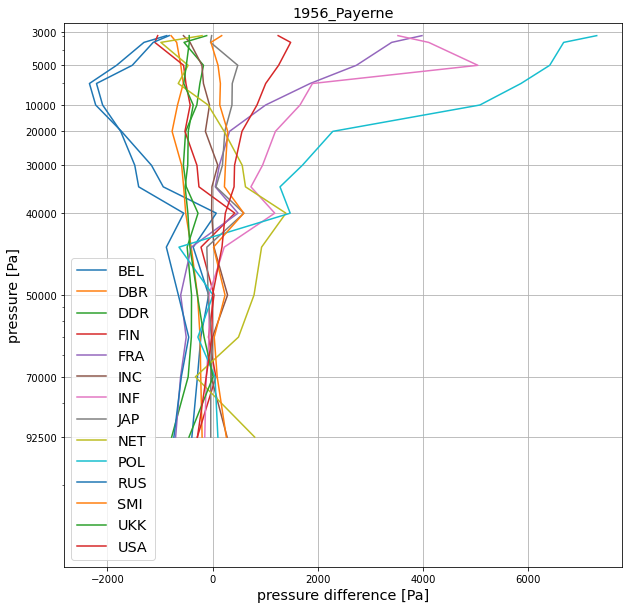

In [9]:
fig, (ax1) = plt.subplots(1)
yplevs = np.array([30,50,100,200,300,400,500,700,925])*100.
#     -
for i in range(len(means)):
    ax1.semilogy(np.nanmean(means[i], axis = 0), pressure_list)
ax1.set(xlabel ='pressure difference [Pa]', ylabel='pressure [Pa]', title=picname)
ax1.set_yticks(ticks=yplevs)
ax1.set_yticklabels(map("{:.0f}".format,np.flip(yplevs)),rotation='horizontal')
ax1.set_ylim(100000,1000)
for i in range(len(st)):
    st[i]= str.upper(st[i][-3:])
ax1.legend(st, loc='best')
ax1.invert_yaxis()
ax1.grid()
plt.show()